<a href="https://colab.research.google.com/github/ssupessu/TMSds/blob/main/lesson13/wow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("wowbgs.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Battleground  3726 non-null   object 
 1   Code          3726 non-null   object 
 2   Faction       3726 non-null   object 
 3   Class         3726 non-null   object 
 4   KB            3726 non-null   int64  
 5   D             3726 non-null   int64  
 6   HK            3726 non-null   int64  
 7   DD            3726 non-null   int64  
 8   HD            3726 non-null   int64  
 9   Honor         3726 non-null   int64  
 10  Win           1889 non-null   float64
 11  Lose          1837 non-null   float64
 12  Rol           3726 non-null   object 
 13  BE            529 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 407.7+ KB


Code: Код для поля боя (не требуется для анализа).

Faction: Фракция игрока (Орда или Альянс).

Class: Класс игрока (воин, паладин, охотник, разбойник, жрец, рыцарь смерти, шаман, маг, чернокнижник, монах, друид, охотник на демонов).

KB: Количество смертей, нанесенных игроком.

D: Количество раз, когда игрок погибал.

HK: Количество убийств, в которых игрок или его/ее группа принимали участие.

DD: Урон, нанесенный игроком.

HD: Исцеление, выполненное игроком.

Honor: Почет, присужденный игроку.

Win: 1, если игрок победил.

Lose: 1, если игрок проиграл.

Rol: Роль игрока (dps, если игрок наносит урон; heal, если игрок сосредоточен на исцелении союзников). Обратите внимание, что не все классы могут быть целителями, только шаман, паладин, жрец, монах и друид, но все классы могут быть наносящими урон.

BE: Индикатор бонусного события (1, если поле боя произошло во время этой недели).

In [ ]:
df.shape

(3726, 14)

In [ ]:
df.head()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,0,1,dps,1
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,0,1,dps,1
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,1,0,heal,1
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,1,0,heal,1
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,1,0,dps,1


In [ ]:
df['Win'] = df['Win'].isnull().astype(int)
df['Lose'] = df['Lose'].isnull().astype(int)
df['BE'] = df['BE'].isnull().astype(int)

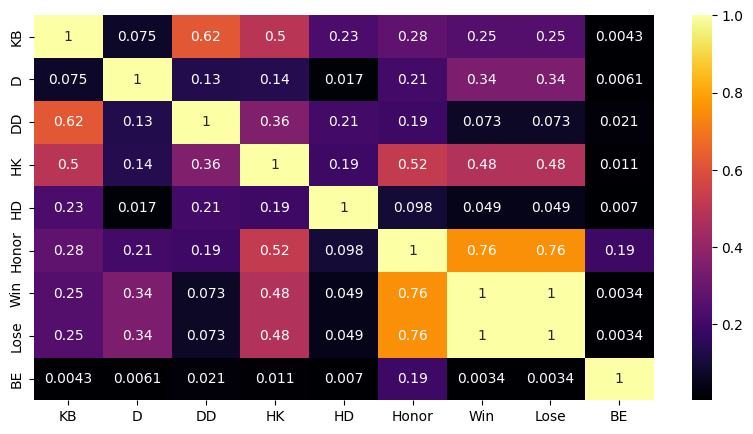

In [ ]:
plt.figure(figsize=(10,5))
matrix_corr = df.loc[:,['KB','D','DD','HK','HD','Honor','Win','Lose','BE']].corr()
ax = sns.heatmap(abs(matrix_corr),cmap='inferno', annot= True)

In [ ]:
df.Class.unique()

array(['Hunter', 'Death Knight', 'Paladin', 'Rogue', 'Druid', 'Shaman',
       'Priest', 'Demon Hunter', 'Warlock', 'Warrior', 'Monk', 'Mage'],
      dtype=object)

# Количество Классов

<ipython-input-100-9c05f38bab9f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Class', palette='bright', order = class_order)


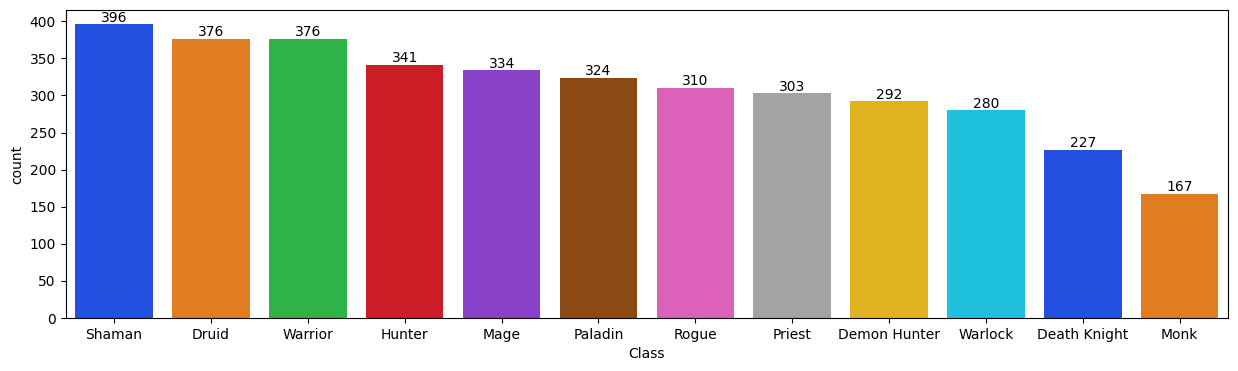

In [ ]:
class_order = df['Class'].value_counts().index
fig, ax = plt.subplots(figsize = (15,4))
sns.countplot(data = df, x = 'Class', palette='bright', order = class_order)
cnt = df.Class.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])


# Разбиение на фракции

<ipython-input-45-6e65bf69e87f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Faction', palette='dark', order = class_order)


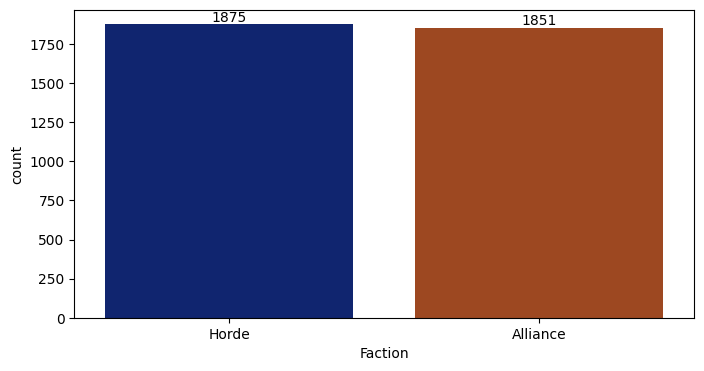

In [ ]:
class_order = df['Faction'].value_counts().index
fig, ax = plt.subplots(figsize = (8,4))
sns.countplot(data = df, x = 'Faction', palette='dark', order = class_order)
cnt = df.Faction.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])


# По ролям

<ipython-input-71-8c68e6c09cde>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Rol', palette='bright', order = class_order)


Text(0.5, 1.0, 'Role')

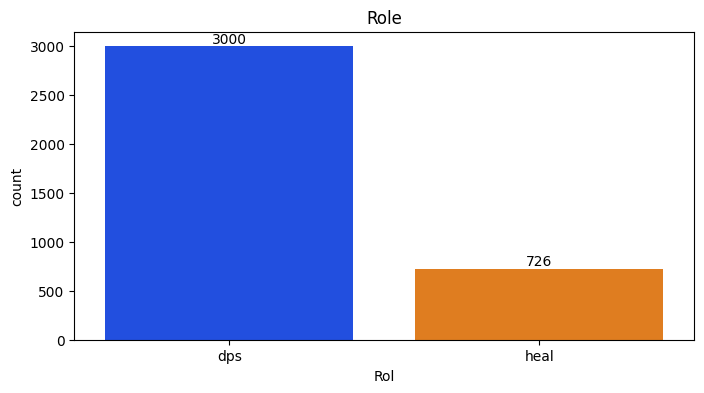

In [ ]:
class_order = df['Rol'].value_counts().index
fig, ax = plt.subplots(figsize = (8,4))
sns.countplot(data = df, x = 'Rol', palette='bright', order = class_order)
cnt = df.Rol.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])


# Характеристики для победителей и проигравших

In [ ]:

df_win = df[df['Win']==1]
df_lose = df[df['Lose']==1]

In [244]:

df_win_healer = df_win[(df_win['Class']=='Shaman') | (df_win['Class']=='Paladin') | (df_win['Class']=='Priest') | (df_win['Class']=='Monk') | (df_win['Class']=='Druid')]
df_win_damager = df_win[(df_win['Class']!='Shaman') & (df_win['Class']!='Paladin') & (df_win['Class']!='Priest') & (df_win['Class']!='Monk') & (df_win['Class']!='Druid')]

df_lose_healer = df_lose[(df_lose['Class']=='Shaman') | (df_lose['Class']=='Paladin') | (df_lose['Class']=='Priest') | (df_lose['Class']=='Monk') | (df_lose['Class']=='Druid')]
df_lose_damager = df_lose[(df_lose['Class']!='Shaman') & (df_lose['Class']!='Paladin') & (df_lose['Class']!='Priest') & (df_lose['Class']!='Monk') & (df_lose['Class']!='Druid')]

<ipython-input-224-077a2cc36cfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_win, x = 'Class', palette='coolwarm', order = class_order)


Text(0.5, 1.0, 'Win')

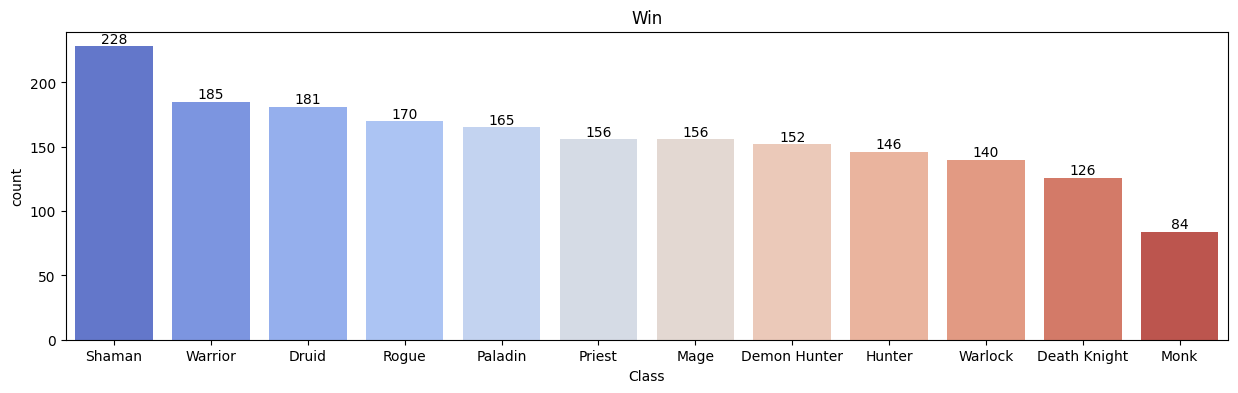

In [ ]:
class_order = df_win['Class'].value_counts().index
fig, ax = plt.subplots(figsize = (15,4))
sns.countplot(data = df_win, x = 'Class', palette='coolwarm', order = class_order)
cnt = df_win.Class.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])
plt.title('Win')

<ipython-input-223-7ae78dc21e34>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_lose, x = 'Class', palette='pink', order = class_order)


Text(0.5, 1.0, 'Lose')

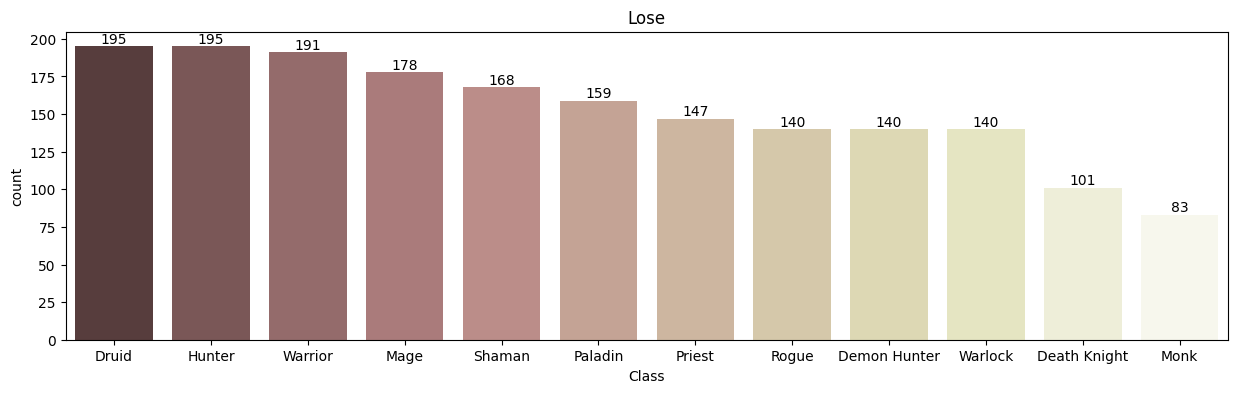

In [ ]:
class_order = df_lose['Class'].value_counts().index
fig, ax = plt.subplots(figsize = (15,4))
sns.countplot(data = df_lose, x = 'Class', palette='pink', order = class_order)
cnt = df_lose.Class.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])
plt.title('Lose')

<ipython-input-102-8ee5828dfde4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_win, x = 'Faction', palette='plasma', order = class_order)
<ipython-input-102-8ee5828dfde4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_lose, x = 'Faction', palette='magma', order = class_order)


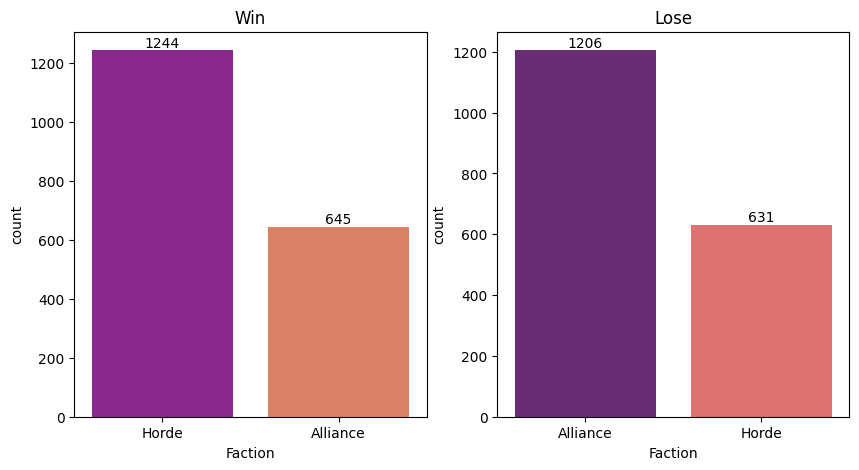

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
class_order = df_win['Faction'].value_counts().index
sns.countplot(data = df_win, x = 'Faction', palette='plasma', order = class_order)
cnt = df_win.Faction.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])
plt.title('Win')

ax = plt.subplot(1,2,2)
class_order = df_lose['Faction'].value_counts().index
sns.countplot(data = df_lose, x = 'Faction', palette='magma', order = class_order)
cnt = df_lose.Faction.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])

plt.title('Lose')
plt.show()

<ipython-input-103-18cdab03a7ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_win, x = 'Rol', palette='crest', order = class_order)
<ipython-input-103-18cdab03a7ca>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_lose, x = 'Rol', palette='rocket', order = class_order)


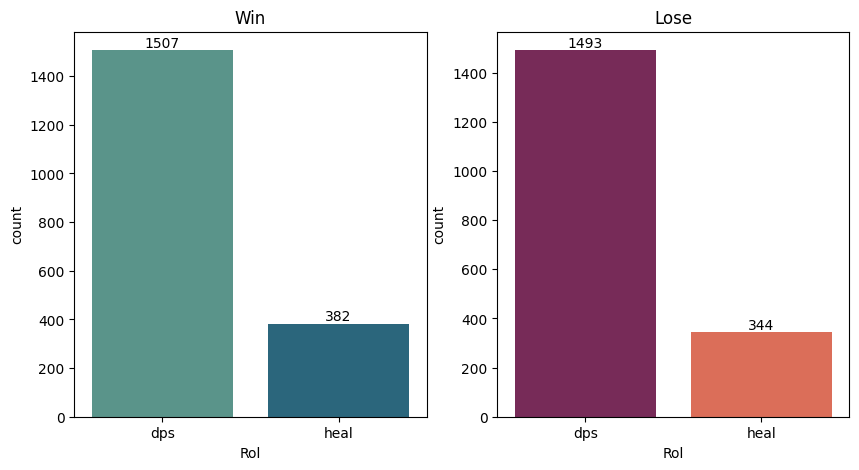

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
class_order = df_win['Rol'].value_counts().index
sns.countplot(data = df_win, x = 'Rol', palette='crest', order = class_order)
cnt = df_win.Rol.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])
plt.title('Win')

ax = plt.subplot(1,2,2)
class_order = df_lose['Rol'].value_counts().index
sns.countplot(data = df_lose, x = 'Rol', palette='rocket', order = class_order)
cnt = df_lose.Rol.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])

plt.title('Lose')
plt.show()

Text(0.5, 1.0, 'LOSE')

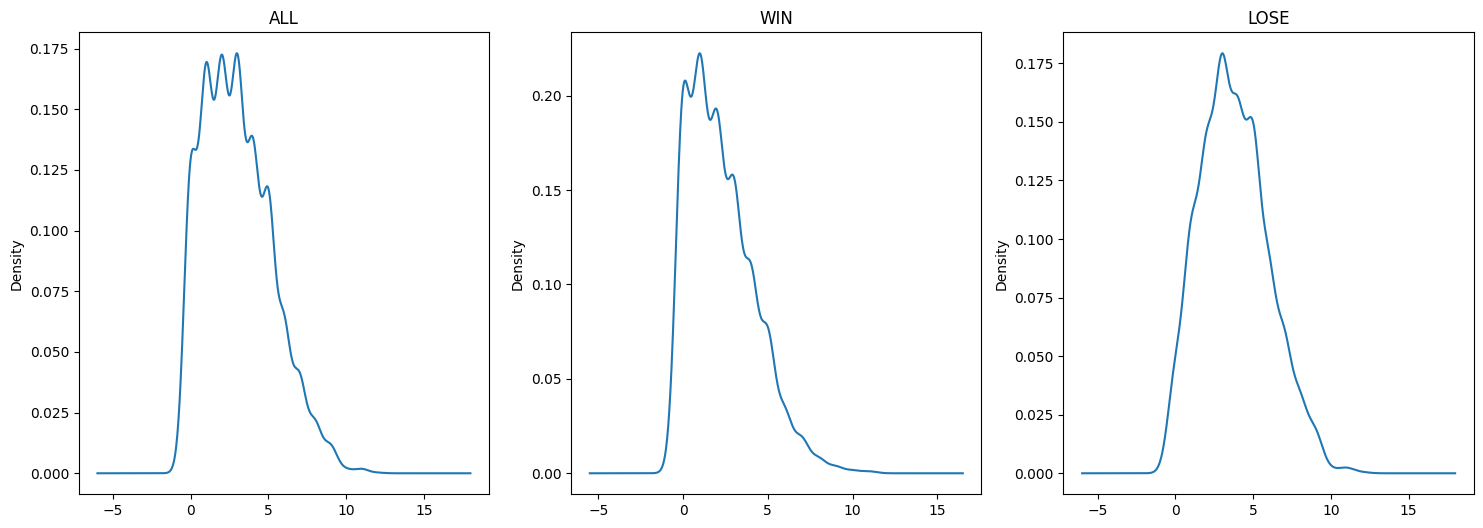

In [ ]:
#Количество смертей всех
plt.figure(figsize = (18, 6))
ax = plt.subplot(1,3,1)
df.D.plot(kind='kde')
plt.title('ALL')

ax = plt.subplot(1,3,2)
df_win.D.plot(kind='kde')
plt.title('WIN')

ax = plt.subplot(1,3,3)
df_lose.D.plot(kind='kde')
plt.title('LOSE')

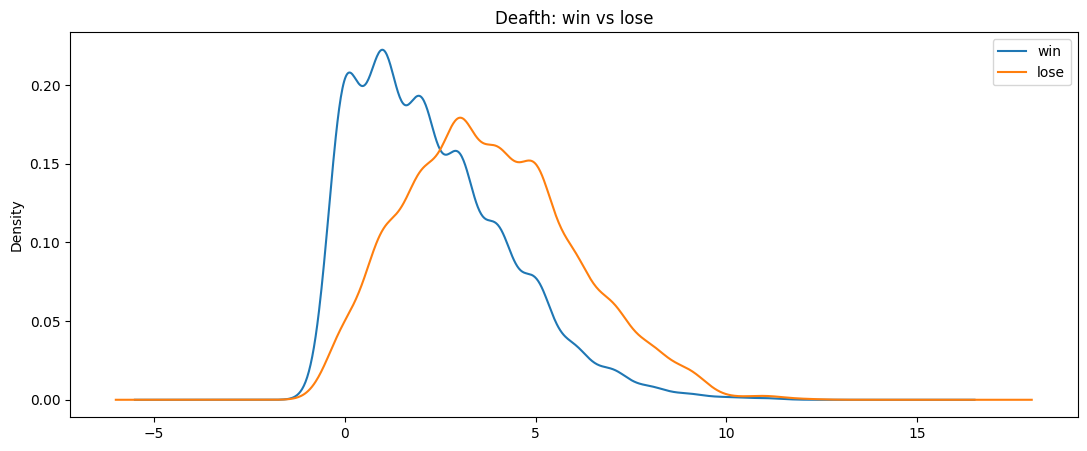

In [ ]:
plt.figure(figsize=(13, 5))

df_win.D.plot(kind='kde',title= 'Deafth: win vs lose')
df_lose.D.plot(kind='kde')
plt.legend(['win', 'lose'])

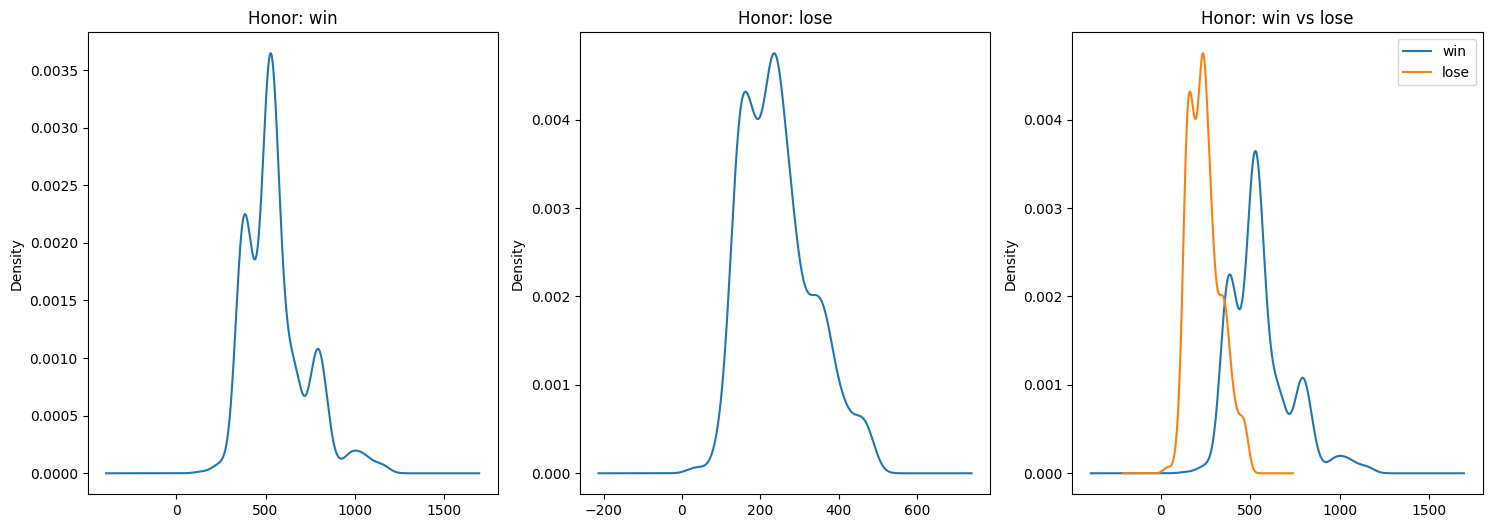

In [ ]:
# Почет, присужденный игроку.
plt.figure(figsize = (18, 6))
ax = plt.subplot(1,3,1)

df_win.Honor.plot(kind='kde',title= 'Honor: win')

ax = plt.subplot(1,3,2)
df_lose.Honor.plot(kind='kde',title= 'Honor: lose')

ax = plt.subplot(1,3,3)
df_win.Honor.plot(kind='kde',title= 'Honor: win vs lose')
df_lose.Honor.plot(kind='kde')
plt.legend(['win', 'lose'])

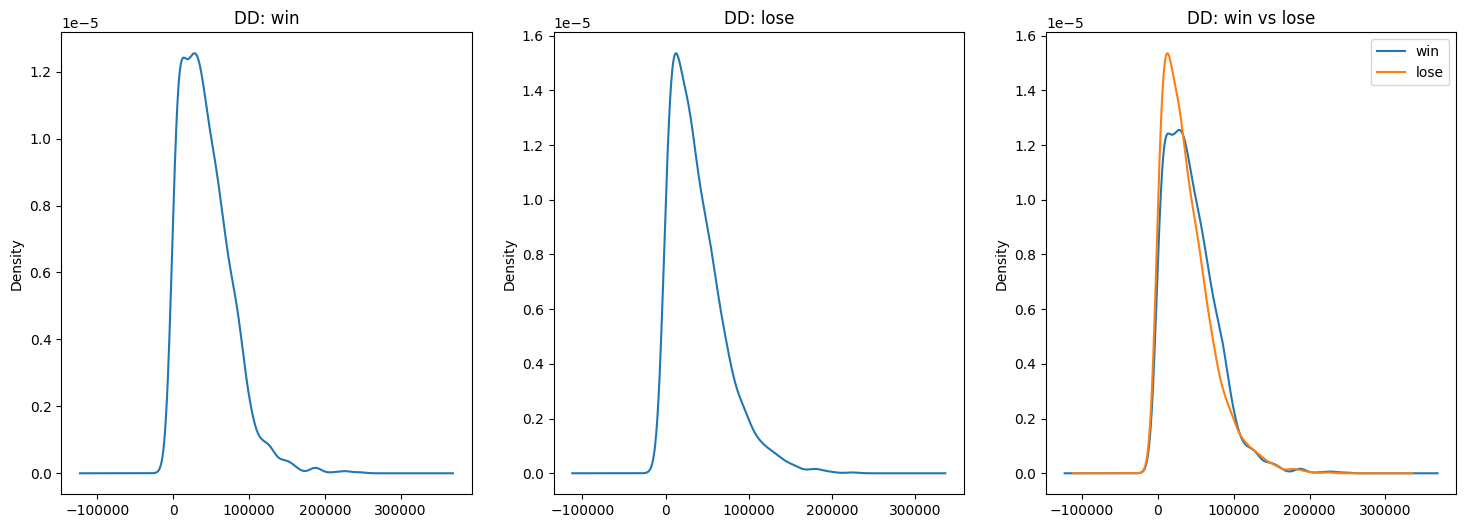

In [ ]:
#Урон, нанесенный игроком.
plt.figure(figsize = (18, 6))
ax = plt.subplot(1,3,1)

df_win.DD.plot(kind='kde',title= 'DD: win')

ax = plt.subplot(1,3,2)
df_lose.DD.plot(kind='kde',title= 'DD: lose')

ax = plt.subplot(1,3,3)
df_win.DD.plot(kind='kde',title= 'DD: win vs lose')
df_lose.DD.plot(kind='kde')
plt.legend(['win', 'lose'])

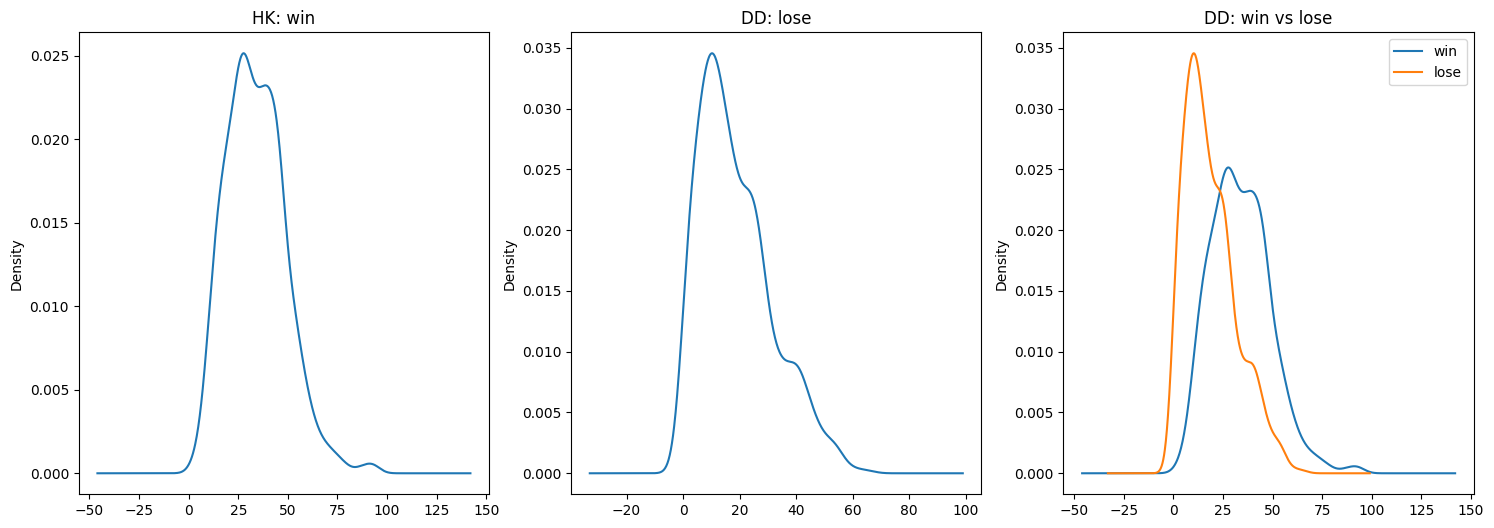

In [ ]:
#Количество убийств, в которых игрок или его/ее группа принимали участие.
plt.figure(figsize = (18, 6))
ax = plt.subplot(1,3,1)

df_win.HK.plot(kind='kde',title= 'HK: win')

ax = plt.subplot(1,3,2)
df_lose.HK.plot(kind='kde',title= 'DD: lose')

ax = plt.subplot(1,3,3)
df_win.HK.plot(kind='kde',title= 'DD: win vs lose')
df_lose.HK.plot(kind='kde')
plt.legend(['win', 'lose'])

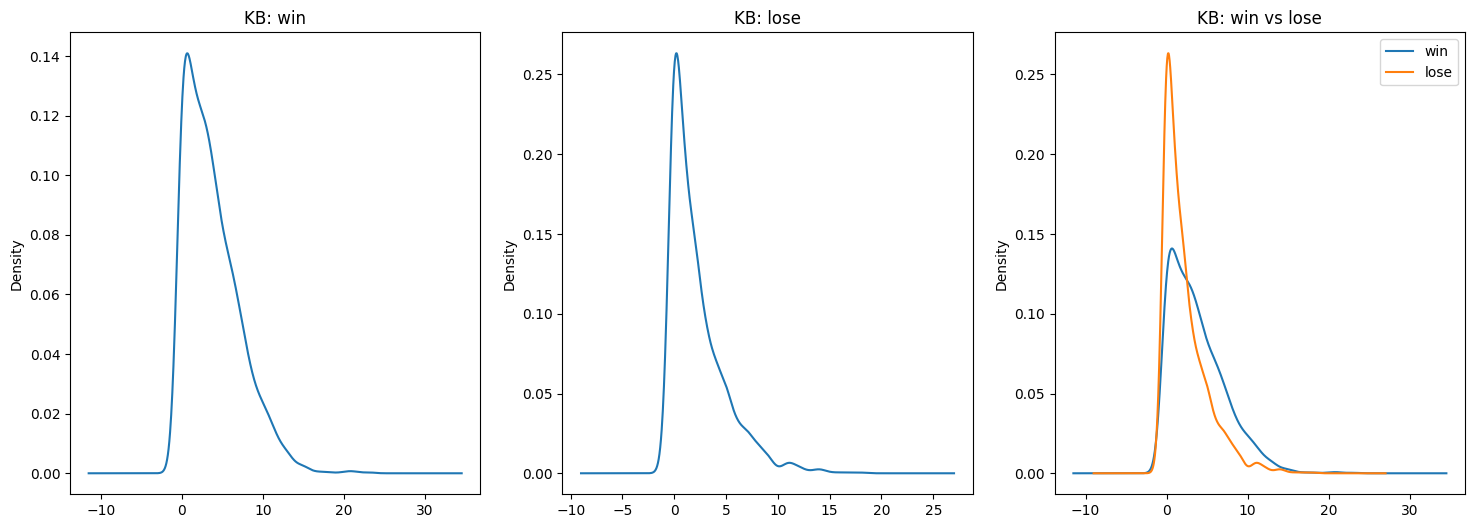

In [ ]:
#Количество смертей, нанесенных игроком.
plt.figure(figsize = (18, 6))
ax = plt.subplot(1,3,1)

df_win.KB.plot(kind='kde',title= 'KB: win')

ax = plt.subplot(1,3,2)
df_lose.KB.plot(kind='kde',title= 'KB: lose')

ax = plt.subplot(1,3,3)
df_win.KB.plot(kind='kde',title= 'KB: win vs lose')
df_lose.KB.plot(kind='kde')
plt.legend(['win', 'lose'])

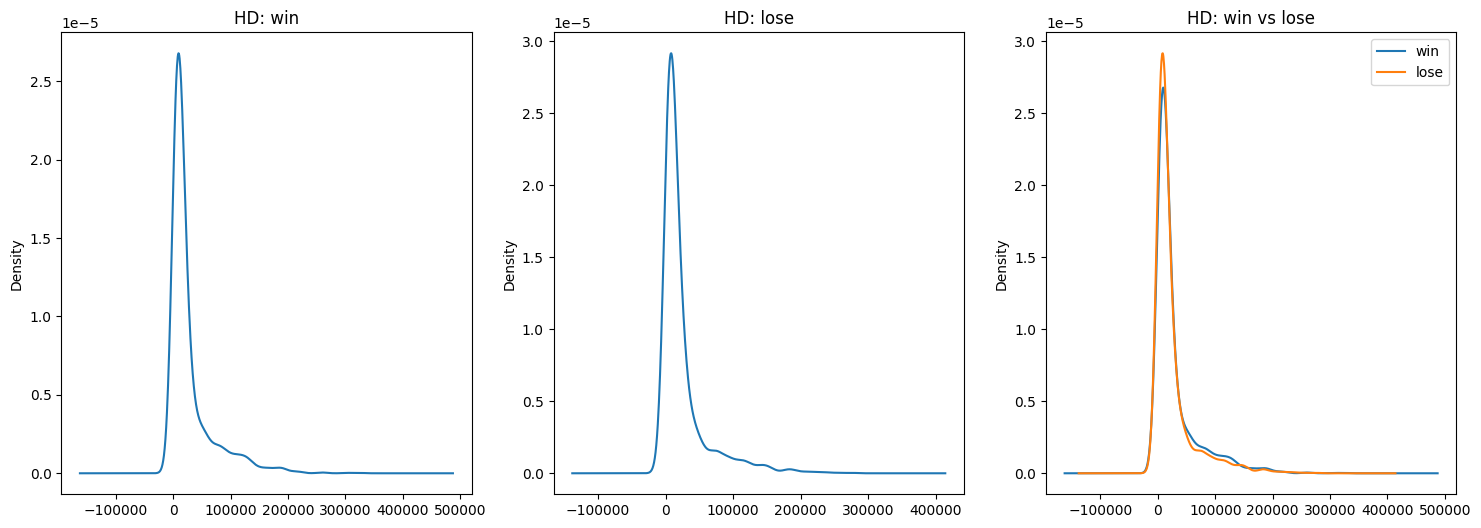

In [ ]:
# Исцеление, выполненное игроком.
plt.figure(figsize = (18, 6))
ax = plt.subplot(1,3,1)

df_win.HD.plot(kind='kde',title= 'HD: win')

ax = plt.subplot(1,3,2)
df_lose.HD.plot(kind='kde',title= 'HD: lose')

ax = plt.subplot(1,3,3)
df_win.HD.plot(kind='kde',title= 'HD: win vs lose')
df_lose.HD.plot(kind='kde')
plt.legend(['win', 'lose'])

## Рассмотрим каждый показатель для каждой фракции

# Альянс

Победители

<ipython-input-160-3bd22ff5b7fc>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data = df_win[df['Faction']=='Alliance'], x = 'Class', palette='coolwarm', order = class_order)
<ipython-input-160-3bd22ff5b7fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_win[df['Faction']=='Alliance'], x = 'Class', palette='coolwarm', order = class_order)


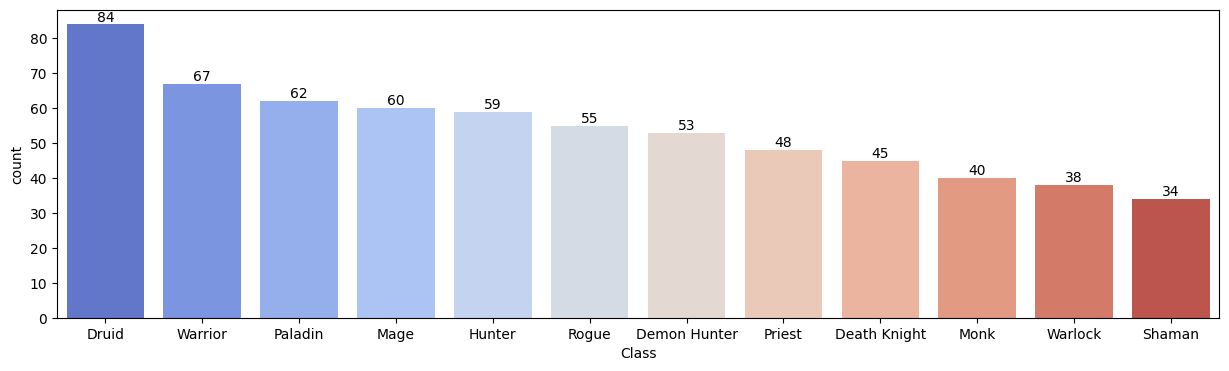

In [ ]:
class_order = df_win[df_win['Faction']=='Alliance']['Class'].value_counts().index
fig, ax = plt.subplots(figsize = (15,4))
sns.countplot(data = df_win[df['Faction']=='Alliance'], x = 'Class', palette='coolwarm', order = class_order)
cnt = df_win.Class.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])

<ipython-input-258-d20f32e7dba5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win[df_win['Faction']=='Alliance']['Class'], y = df_win[df_win['Faction']=='Alliance']['DD'],palette = 'rocket')


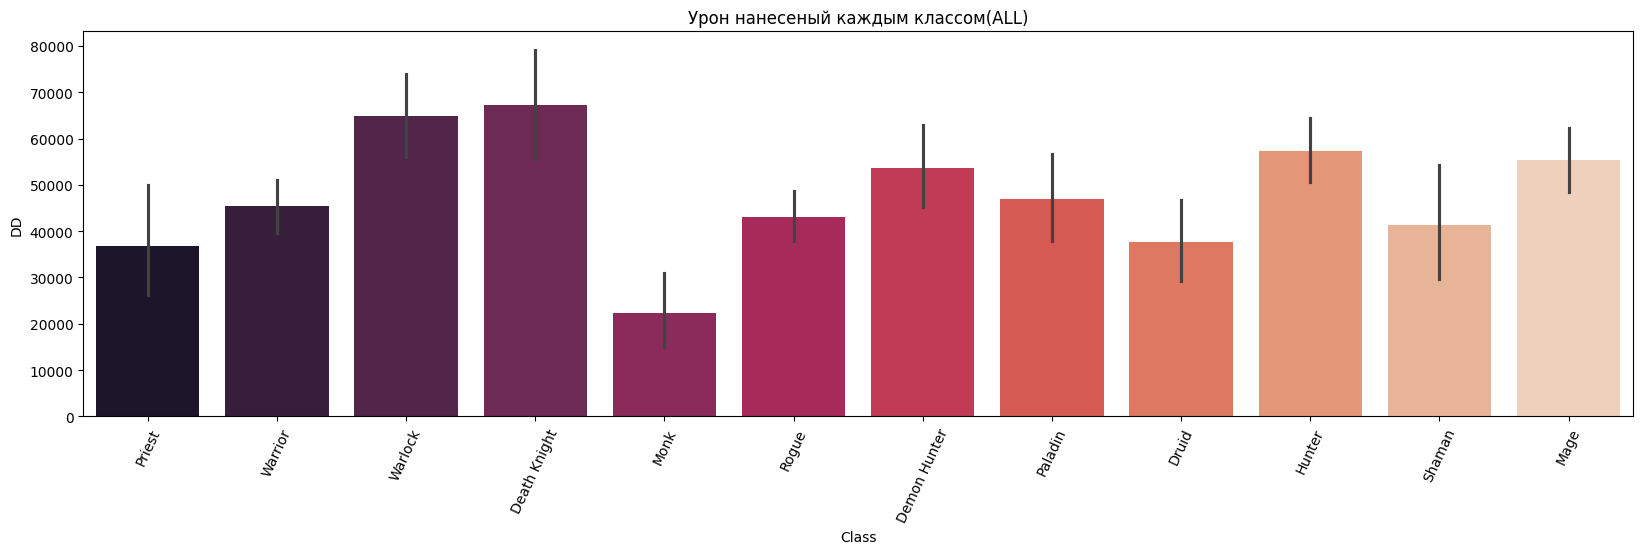

In [258]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win[df_win['Faction']=='Alliance']['Class'], y = df_win[df_win['Faction']=='Alliance']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(ALL)')
plt.show()

<ipython-input-259-29add70519f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win_damager[df_win_damager['Faction']=='Alliance']['Class'], y = df_win_damager[df_win_damager['Faction']=='Alliance']['DD'],palette = 'rocket')


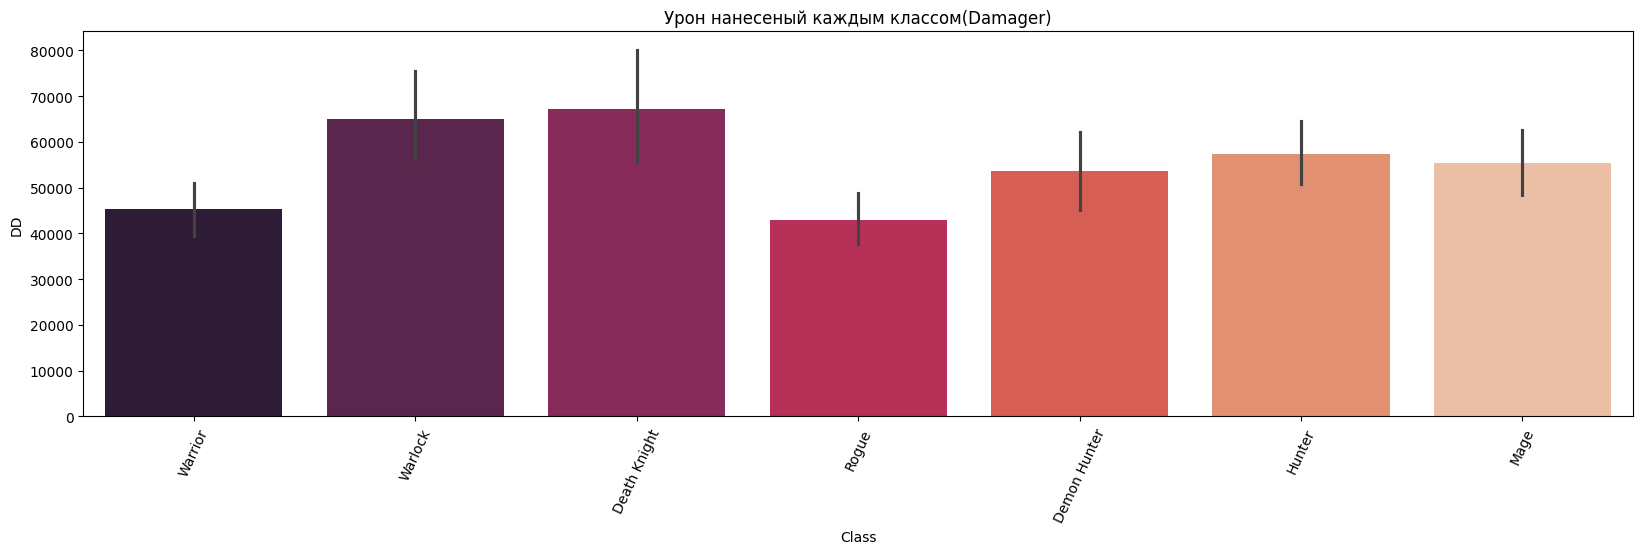

In [259]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win_damager[df_win_damager['Faction']=='Alliance']['Class'], y = df_win_damager[df_win_damager['Faction']=='Alliance']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(Damager)')
plt.show()

<ipython-input-237-c3ff75e354a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win_healer[df_win_healer['Faction']=='Alliance']['Class'], y = df_win_healer[df_win_healer['Faction']=='Alliance']['DD'],palette = 'rocket')


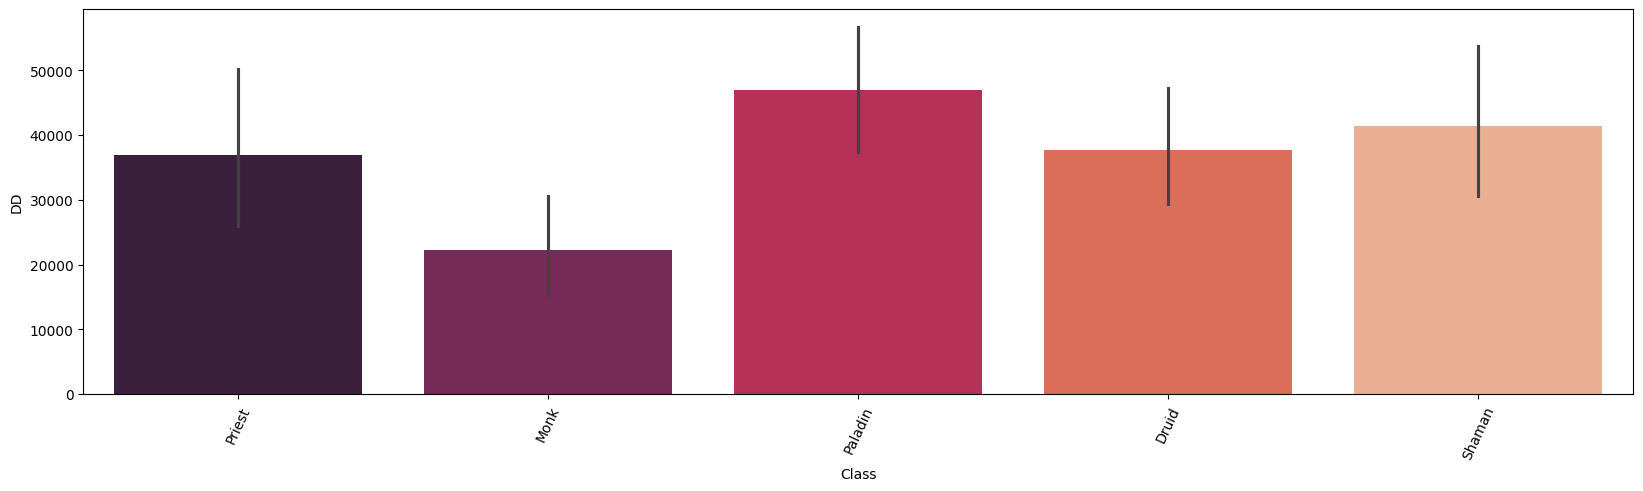

In [237]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win_healer[df_win_healer['Faction']=='Alliance']['Class'], y = df_win_healer[df_win_healer['Faction']=='Alliance']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(Healer)')
plt.show()

<ipython-input-261-1e9369ab2d70>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win[df_win['Faction']=='Alliance']['Class'], y = df_win[df_win['Faction']=='Alliance']['Honor'],palette = 'plasma')


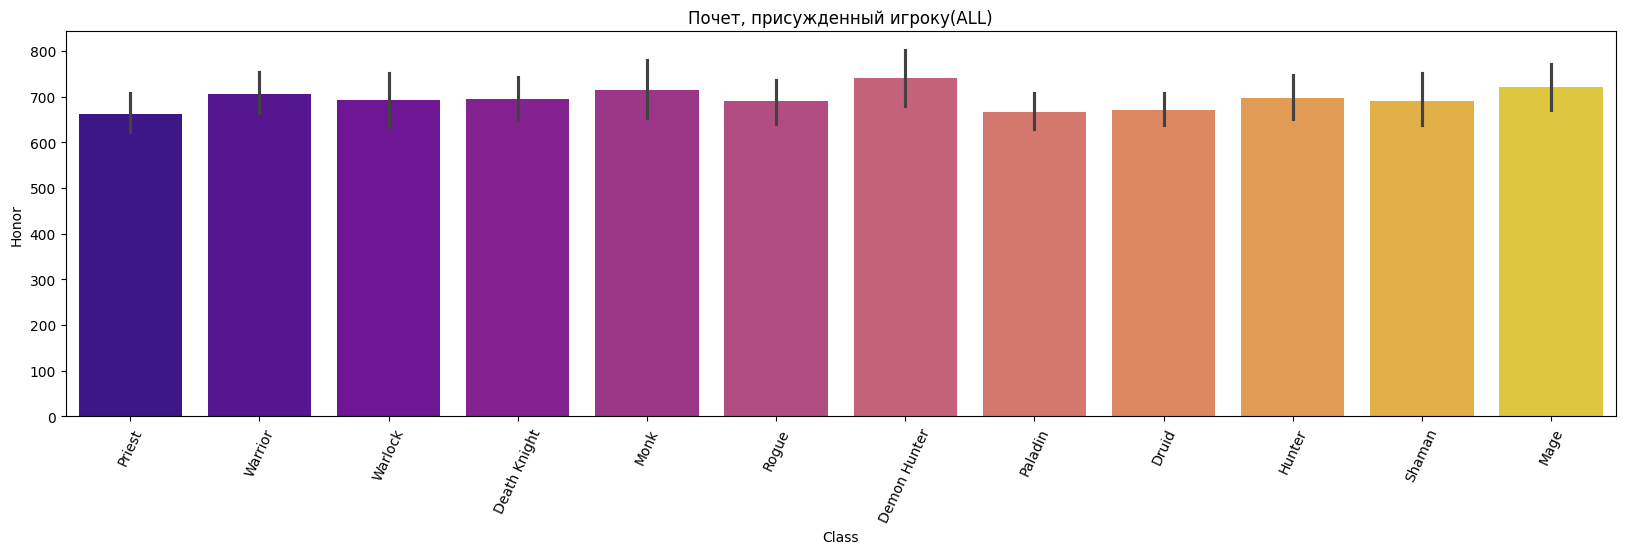

In [261]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win[df_win['Faction']=='Alliance']['Class'], y = df_win[df_win['Faction']=='Alliance']['Honor'],palette = 'plasma')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(ALL)')
plt.show()


<ipython-input-260-710bcf7ac17a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win_damager[df_win_damager['Faction']=='Alliance']['Class'], y = df_win_damager[df_win_damager['Faction']=='Alliance']['Honor'],palette = 'plasma')


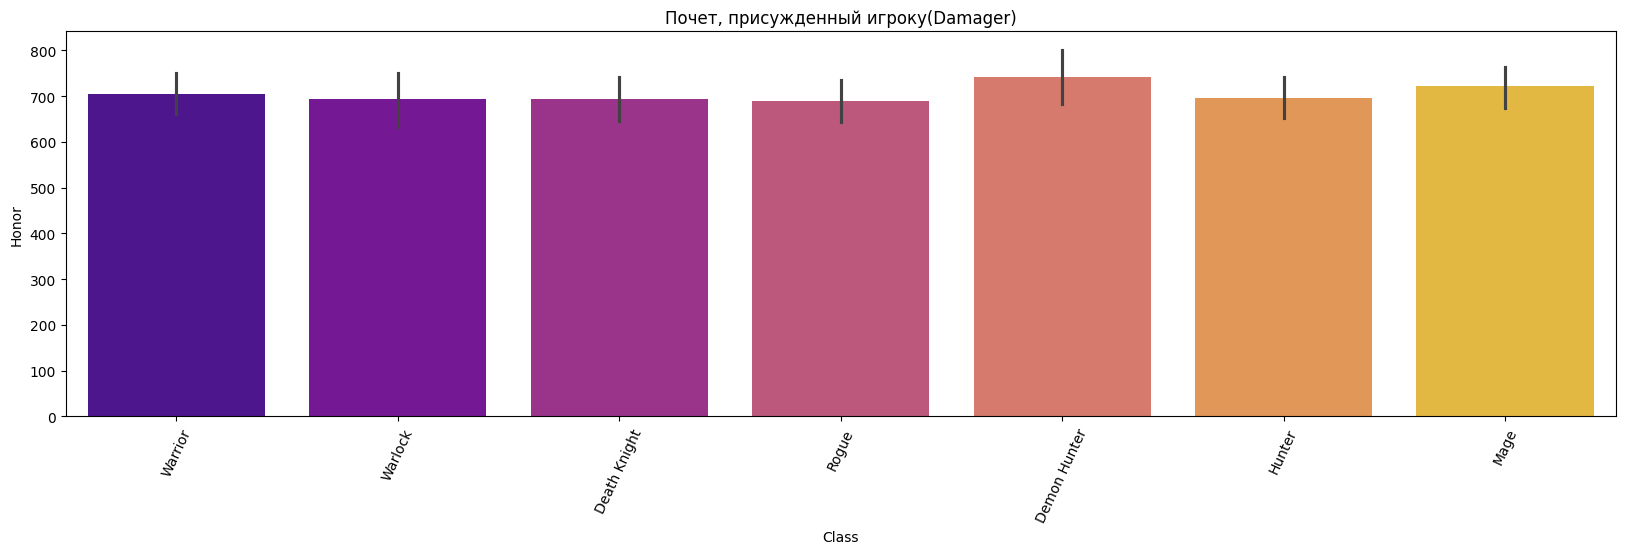

In [260]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win_damager[df_win_damager['Faction']=='Alliance']['Class'], y = df_win_damager[df_win_damager['Faction']=='Alliance']['Honor'],palette = 'plasma')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(Damager)')
plt.show()


<ipython-input-262-e84fbcaf8d85>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win_healer[df_win_healer['Faction']=='Alliance']['Class'], y = df_win_healer[df_win_healer['Faction']=='Alliance']['Honor'],palette = 'plasma')


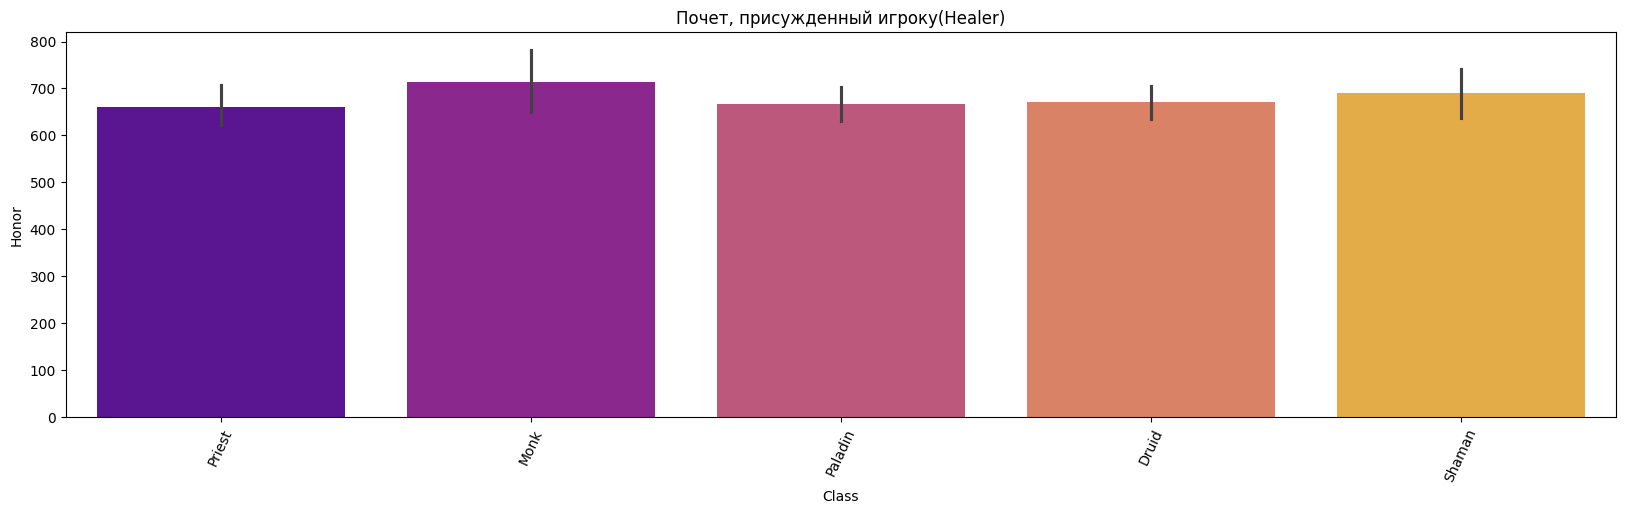

In [262]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win_healer[df_win_healer['Faction']=='Alliance']['Class'], y = df_win_healer[df_win_healer['Faction']=='Alliance']['Honor'],palette = 'plasma')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(Healer)')
plt.show()


<ipython-input-168-e553d5cc468c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_win[df_win['Faction']=='Alliance'], x='Rol', palette='crest', order=class_order)


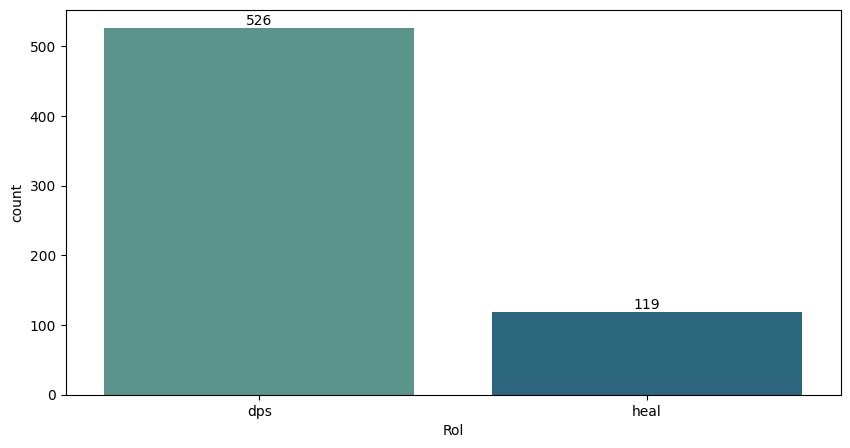

In [ ]:
class_order = df_win[df_win['Faction']=='Alliance']['Rol'].value_counts().index
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_win[df_win['Faction']=='Alliance'], x='Rol', palette='crest', order=class_order)
cnt = df_win['Rol'].nunique()
for i in range(cnt):
    ax.bar_label(ax.containers[i])
plt.show()

<ipython-input-216-bb5f94a8b582>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win[df_win['Faction']=='Alliance']['Class'], y = df_win[df_win['Faction']=='Alliance']['HD'],palette = 'crest')


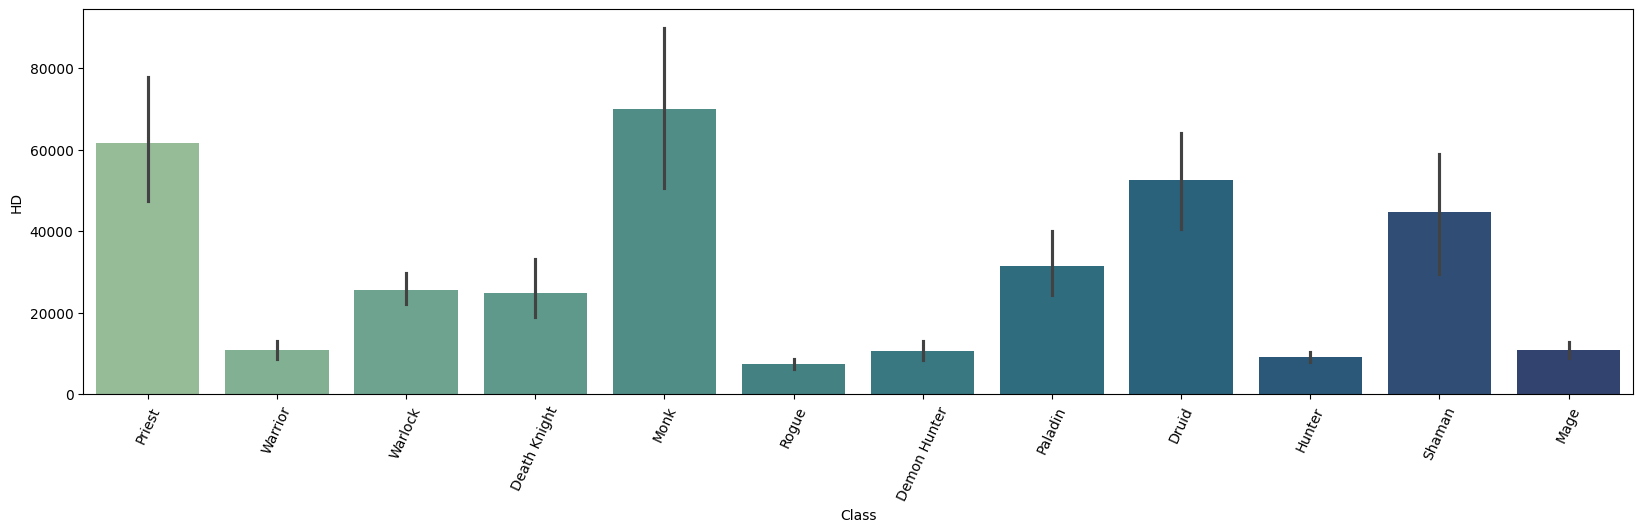

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win[df_win['Faction']=='Alliance']['Class'], y = df_win[df_win['Faction']=='Alliance']['HD'],palette = 'crest')
plt.xlabel('Class')
plt.ylabel('HD')
plt.xticks(rotation = 65)
plt.show()

Проигравшие

<ipython-input-156-d4e4df821d8c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_order = df_lose[df['Faction']=='Alliance']['Class'].value_counts().index
<ipython-input-156-d4e4df821d8c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data = df_lose[df['Faction']=='Alliance'], x = 'Class', palette='coolwarm', order = class_order)
<ipython-input-156-d4e4df821d8c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_lose[df['Faction']=='Alliance'], x = 'Class', palette='coolwarm', order = class_order)


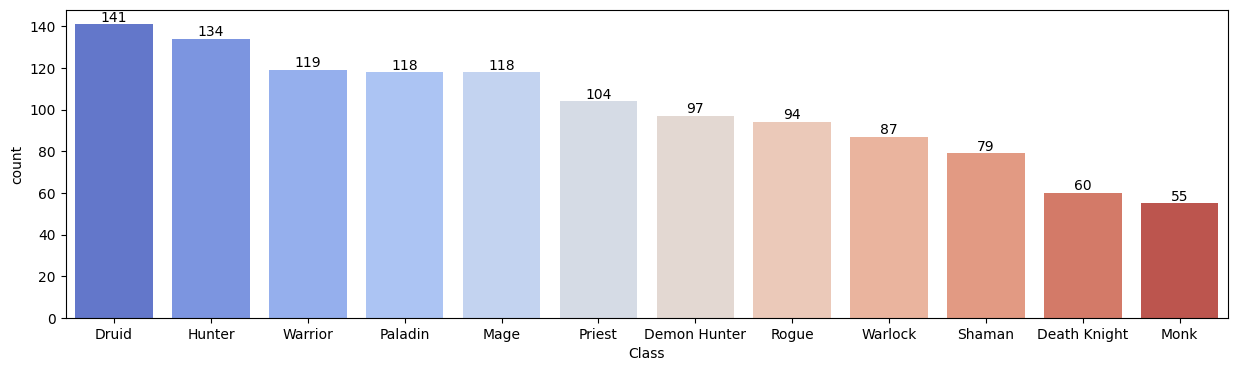

In [ ]:
class_order = df_lose[df_lose['Faction']=='Alliance']['Class'].value_counts().index
fig, ax = plt.subplots(figsize = (15,4))
sns.countplot(data = df_lose[df['Faction']=='Alliance'], x = 'Class', palette='coolwarm', order = class_order)
cnt = df_win.Class.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])

<ipython-input-263-e979093f89cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose[df_lose['Faction']=='Alliance']['Class'], y = df_lose[df_lose['Faction']=='Alliance']['DD'],palette = 'rocket')


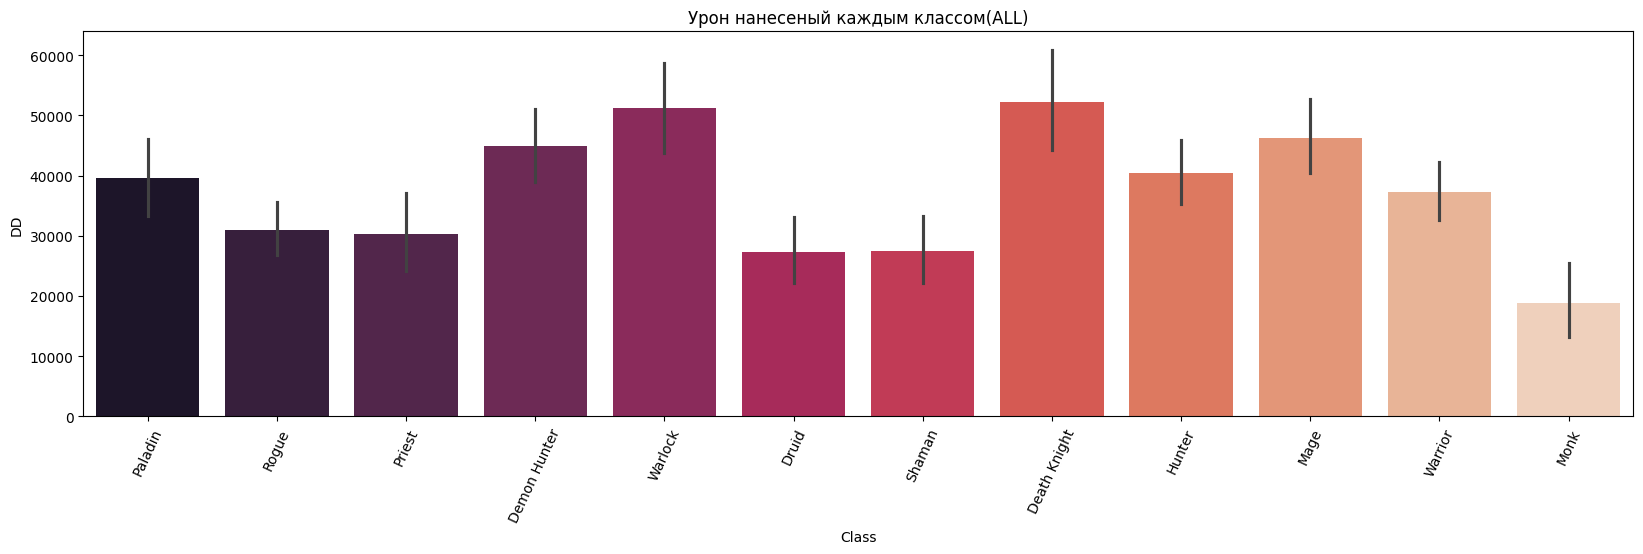

In [263]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose[df_lose['Faction']=='Alliance']['Class'], y = df_lose[df_lose['Faction']=='Alliance']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(ALL)')
plt.show()

<ipython-input-264-dd46ade41d5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose_damager[df_lose_damager['Faction']=='Alliance']['Class'], y = df_lose_damager[df_lose_damager['Faction']=='Alliance']['DD'],palette = 'rocket')


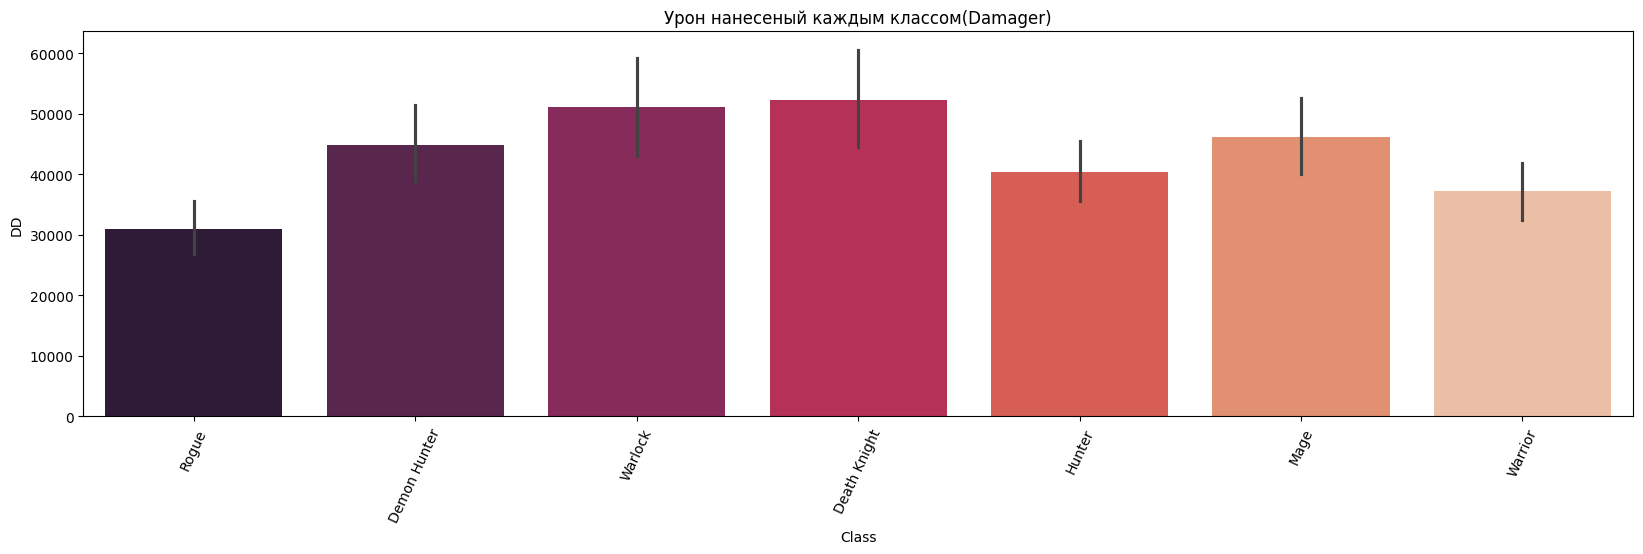

In [264]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose_damager[df_lose_damager['Faction']=='Alliance']['Class'], y = df_lose_damager[df_lose_damager['Faction']=='Alliance']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(Damager)')
plt.show()

<ipython-input-265-d3b736f4e019>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose_healer[df_lose_healer['Faction']=='Alliance']['Class'], y = df_lose_healer[df_lose_healer['Faction']=='Alliance']['DD'],palette = 'rocket')


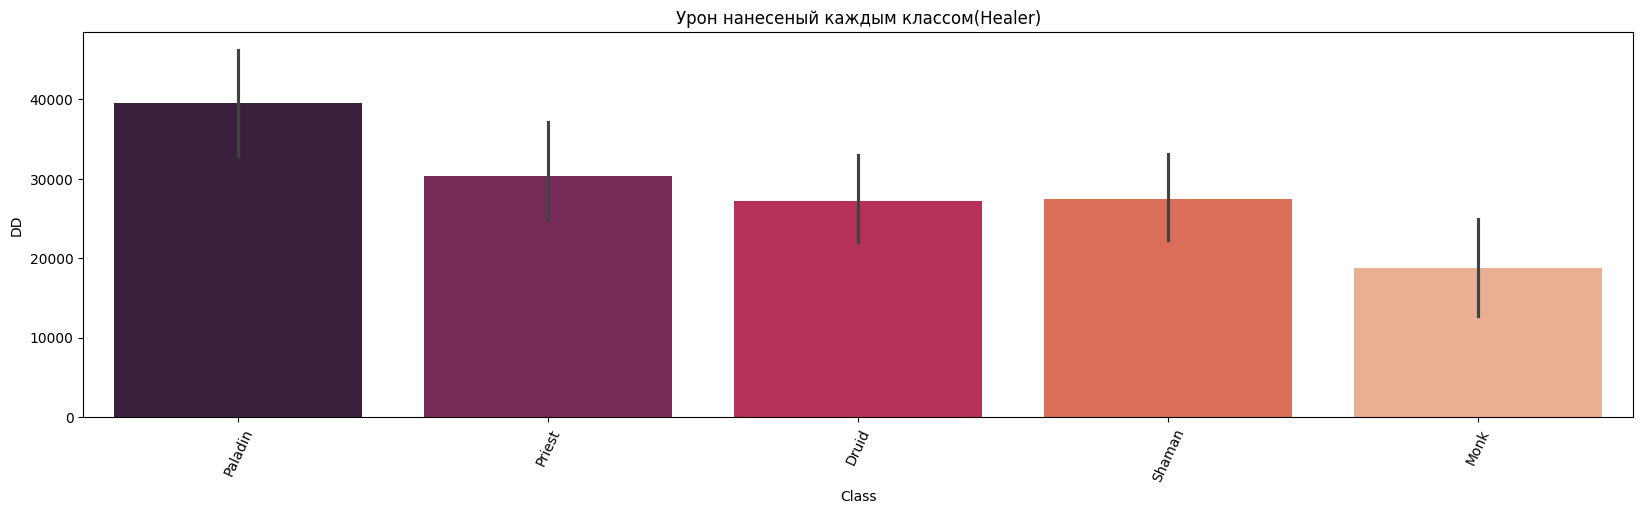

In [265]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose_healer[df_lose_healer['Faction']=='Alliance']['Class'], y = df_lose_healer[df_lose_healer['Faction']=='Alliance']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(Healer)')
plt.show()

<ipython-input-266-846a0a4711a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose[df_lose['Faction']=='Alliance']['Class'], y = df_lose[df_lose['Faction']=='Alliance']['Honor'],palette = 'inferno')


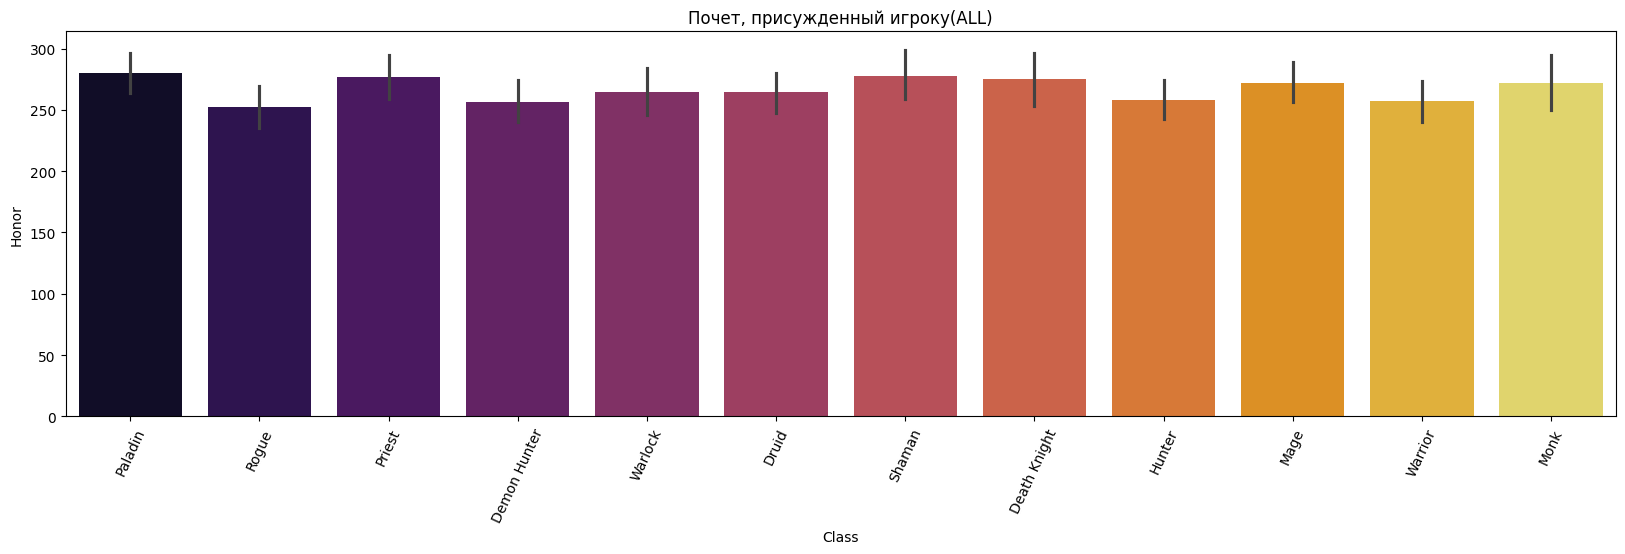

In [266]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose[df_lose['Faction']=='Alliance']['Class'], y = df_lose[df_lose['Faction']=='Alliance']['Honor'],palette = 'inferno')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(ALL)')
plt.show()

<ipython-input-268-3402b325493e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose_damager[df_lose_damager['Faction']=='Alliance']['Class'], y = df_lose_damager[df_lose_damager['Faction']=='Alliance']['Honor'],palette = 'inferno')


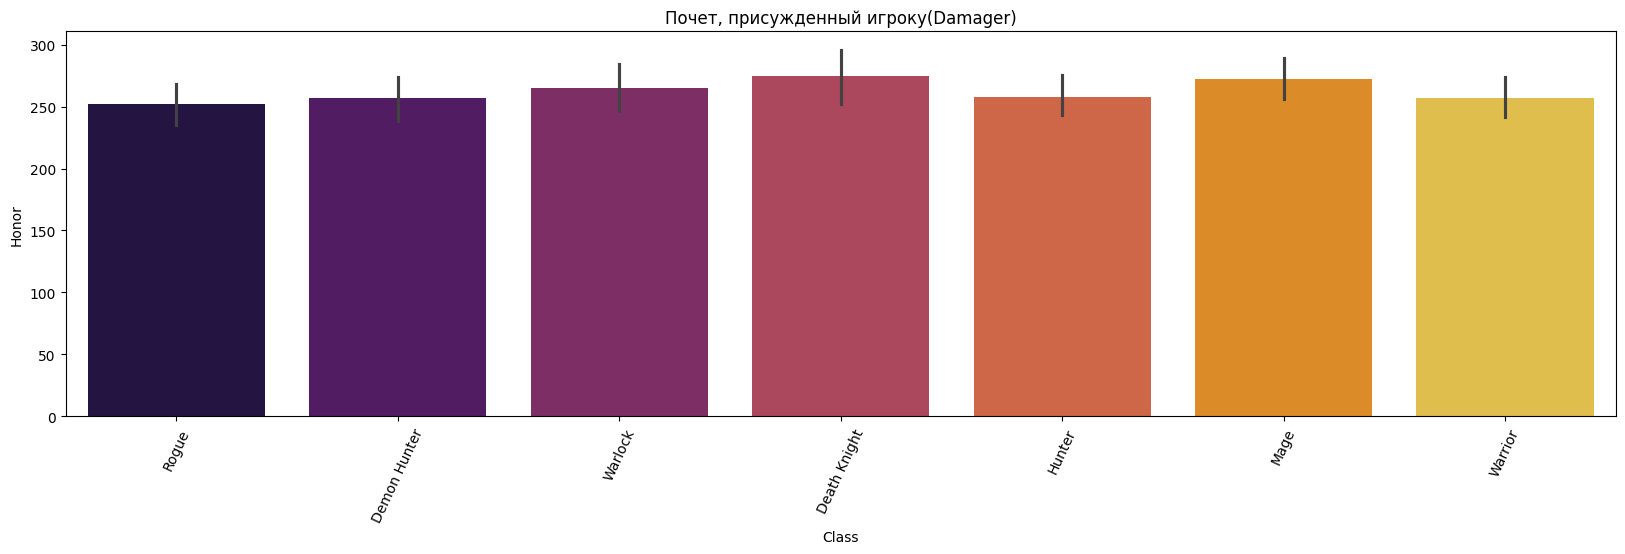

In [268]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose_damager[df_lose_damager['Faction']=='Alliance']['Class'], y = df_lose_damager[df_lose_damager['Faction']=='Alliance']['Honor'],palette = 'inferno')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(Damager)')
plt.show()

<ipython-input-267-f231619e83cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose_healer[df_lose_healer['Faction']=='Alliance']['Class'], y = df_lose_healer[df_lose_healer['Faction']=='Alliance']['Honor'],palette = 'inferno')


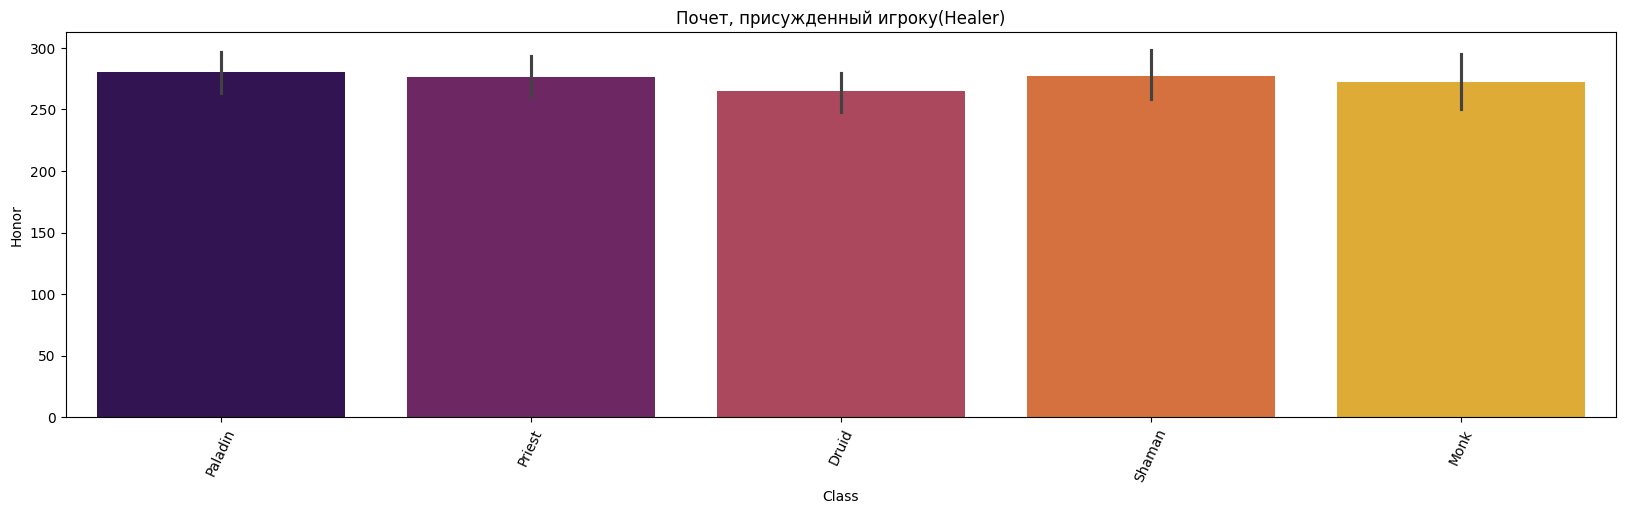

In [267]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose_healer[df_lose_healer['Faction']=='Alliance']['Class'], y = df_lose_healer[df_lose_healer['Faction']=='Alliance']['Honor'],palette = 'inferno')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(Healer)')
plt.show()

<ipython-input-165-882d57c5cf7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df_lose[df_lose['Faction']=='Alliance'], x = 'Rol', palette='crest', order=class_order)


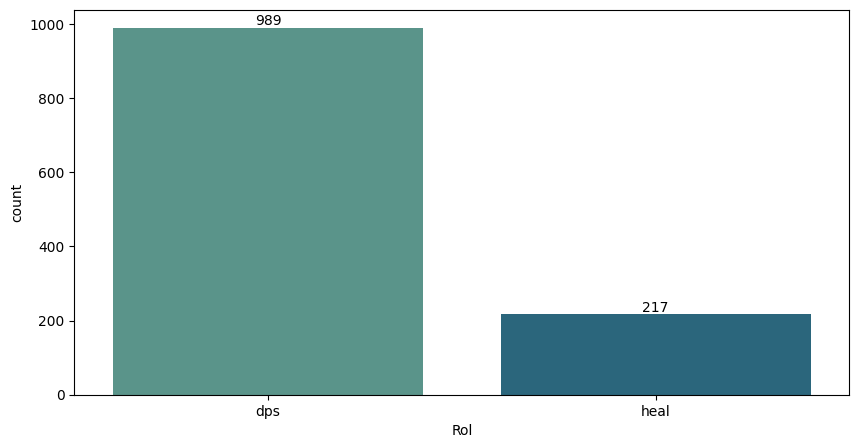

In [ ]:
class_order = df_lose[df_lose['Faction']=='Alliance']['Rol'].value_counts().index
plt.figure(figsize=(10,5))
ax = sns.countplot(data = df_lose[df_lose['Faction']=='Alliance'], x = 'Rol', palette='crest', order=class_order)
cnt = df_lose['Rol'].nunique()
for i in range(cnt):
    ax.bar_label(ax.containers[i])
plt.show()

<ipython-input-214-ecf5dc85f403>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose[df_lose['Faction']=='Alliance']['Class'], y = df_lose[df_lose['Faction']=='Alliance']['HD'],palette = 'crest')


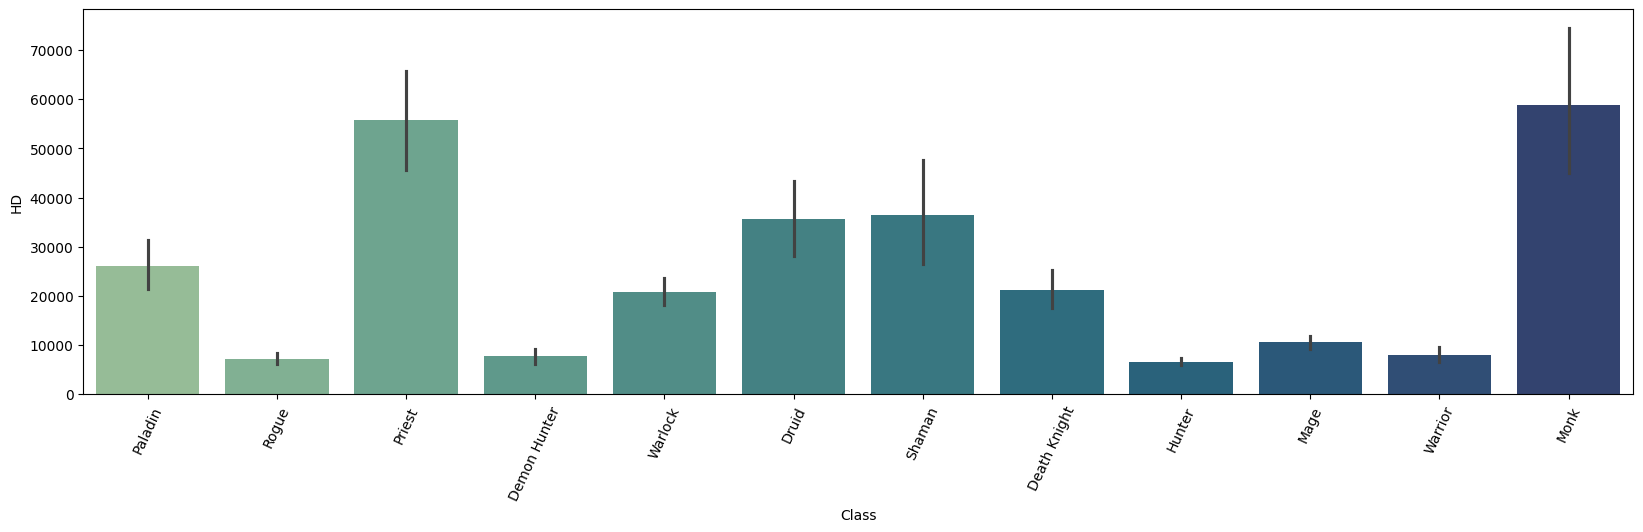

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose[df_lose['Faction']=='Alliance']['Class'], y = df_lose[df_lose['Faction']=='Alliance']['HD'],palette = 'crest')
plt.xlabel('Class')
plt.ylabel('HD')
plt.xticks(rotation = 65)
plt.show()

## Орда

Победители

<ipython-input-169-70b972874e3c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data = df_win[df['Faction']=='Horde'], x = 'Class', palette='coolwarm', order = class_order)
<ipython-input-169-70b972874e3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_win[df['Faction']=='Horde'], x = 'Class', palette='coolwarm', order = class_order)


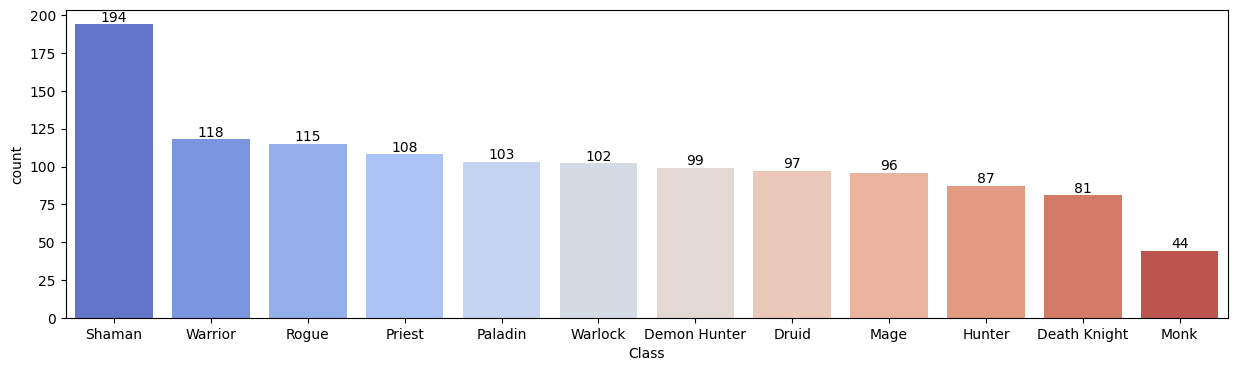

In [ ]:
class_order = df_win[df_win['Faction']=='Horde']['Class'].value_counts().index
fig, ax = plt.subplots(figsize = (15,4))
sns.countplot(data = df_win[df['Faction']=='Horde'], x = 'Class', palette='coolwarm', order = class_order)
cnt = df_win.Class.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])

<ipython-input-270-8026aa3051a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win[df_win['Faction']=='Horde']['Class'], y = df_win[df_win['Faction']=='Horde']['DD'],palette = 'rocket')


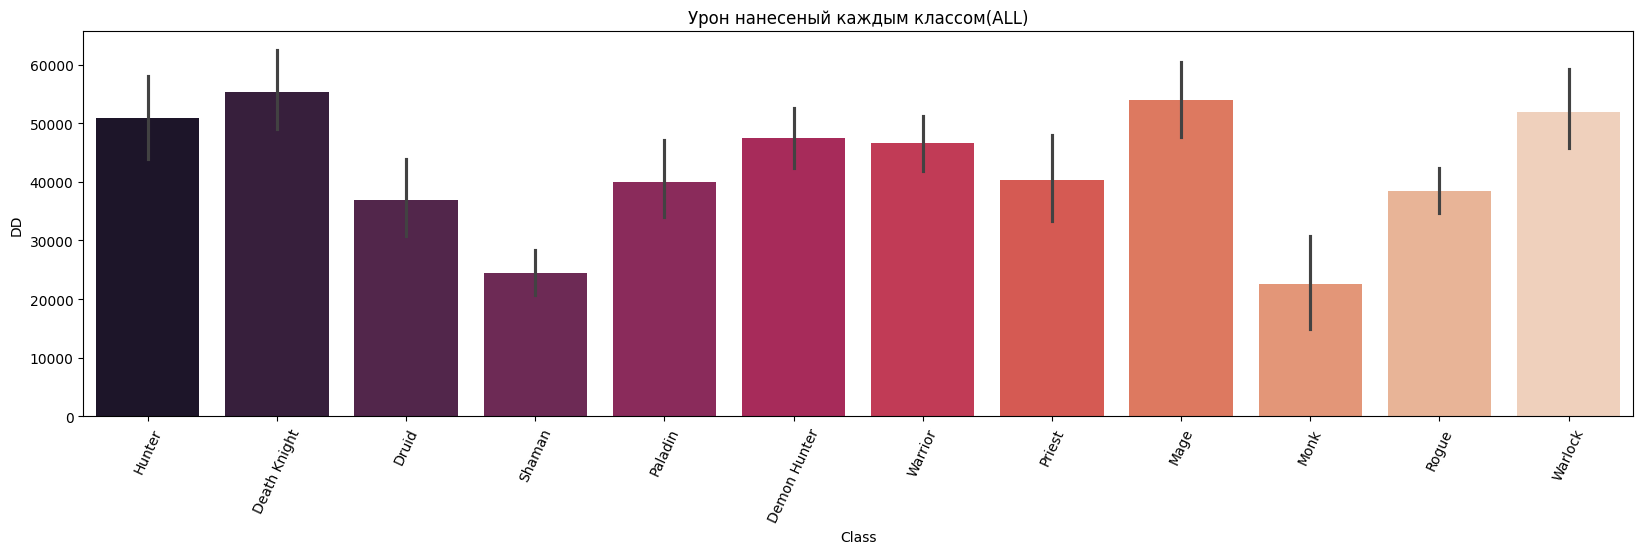

In [270]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win[df_win['Faction']=='Horde']['Class'], y = df_win[df_win['Faction']=='Horde']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(ALL)')
plt.show()

<ipython-input-271-91ca89b102b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win_damager[df_win_damager['Faction']=='Horde']['Class'], y = df_win_damager[df_win_damager['Faction']=='Horde']['DD'],palette = 'rocket')


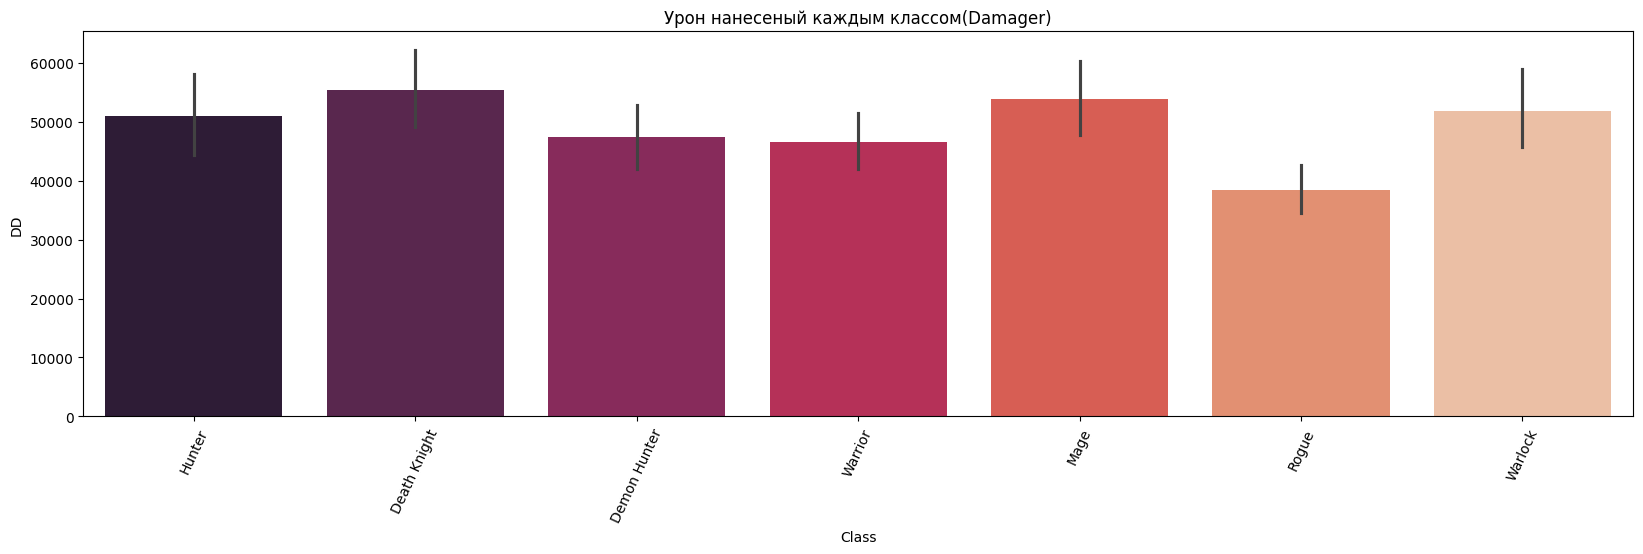

In [271]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win_damager[df_win_damager['Faction']=='Horde']['Class'], y = df_win_damager[df_win_damager['Faction']=='Horde']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(Damager)')
plt.show()

<ipython-input-272-c02b9b23307a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win_healer[df_win_healer['Faction']=='Horde']['Class'], y = df_win_healer[df_win_healer['Faction']=='Horde']['DD'],palette = 'rocket')


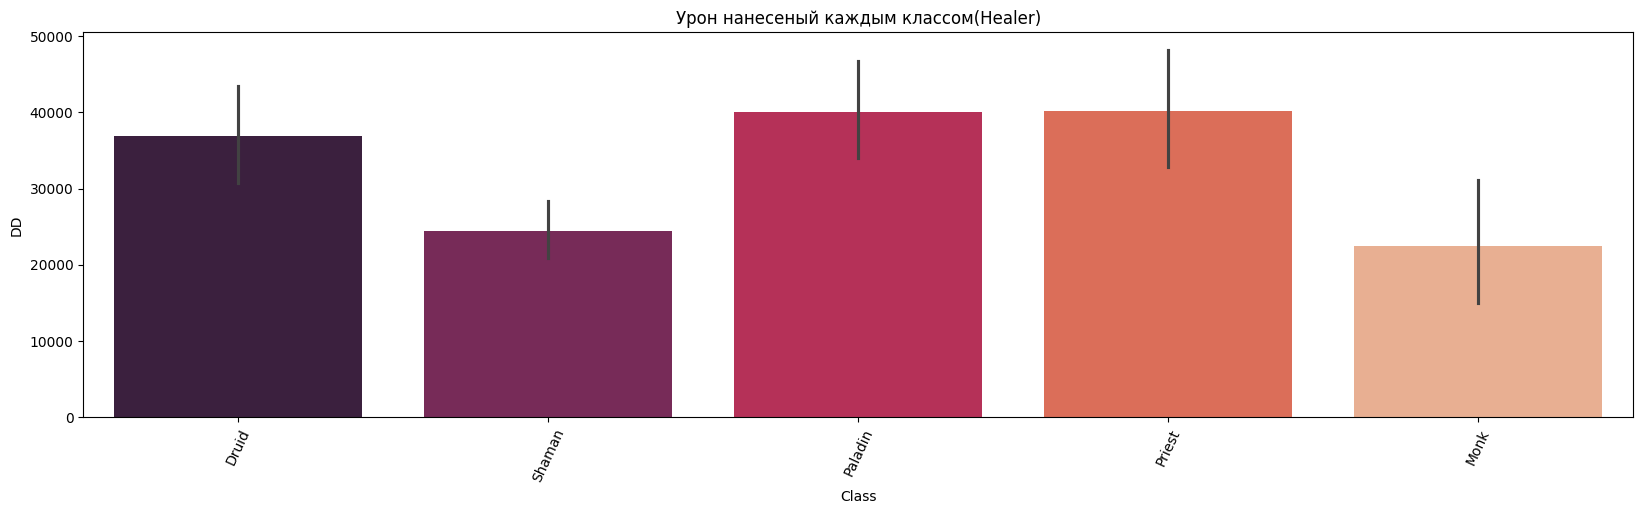

In [272]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win_healer[df_win_healer['Faction']=='Horde']['Class'], y = df_win_healer[df_win_healer['Faction']=='Horde']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(Healer)')
plt.show()

<ipython-input-275-602bb28f8f5a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win[df_win['Faction']=='Horde']['Class'], y = df_win[df_win['Faction']=='Horde']['Honor'],palette = 'plasma')


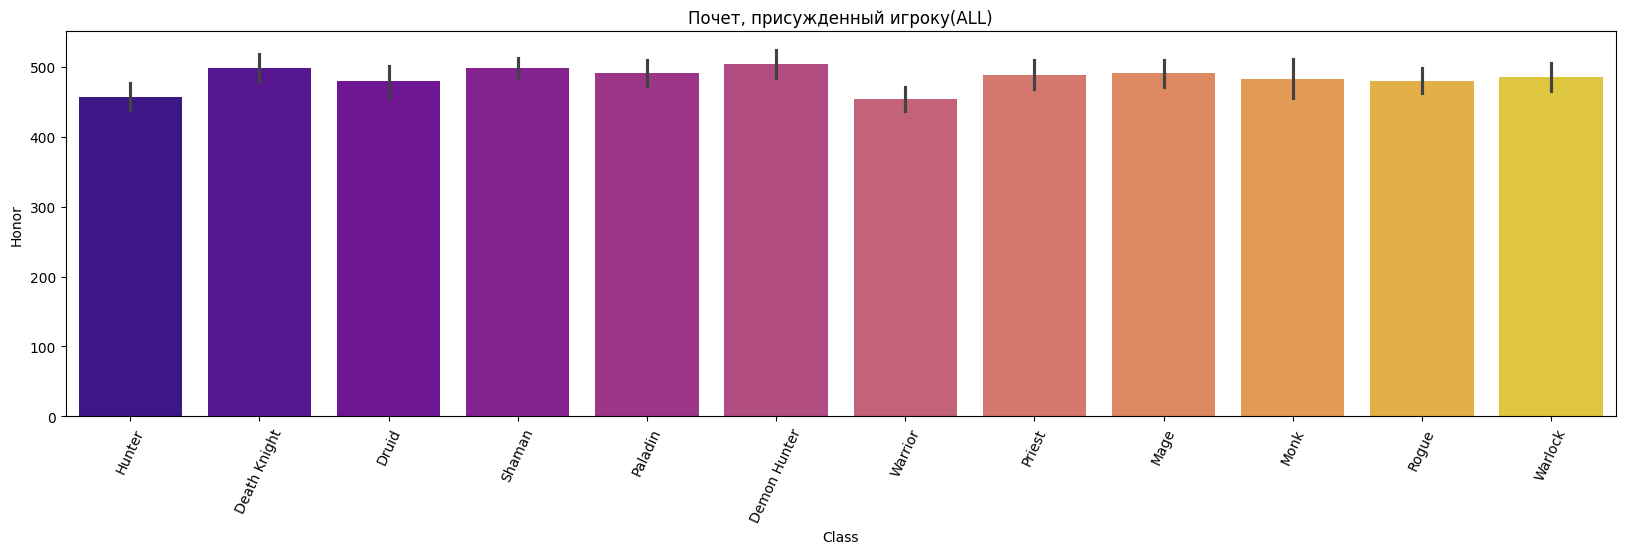

In [275]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win[df_win['Faction']=='Horde']['Class'], y = df_win[df_win['Faction']=='Horde']['Honor'],palette = 'plasma')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(ALL)')
plt.show()


<ipython-input-274-1e2e88b4e01c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win_damager[df_win_damager['Faction']=='Horde']['Class'], y = df_win_damager[df_win_damager['Faction']=='Horde']['Honor'],palette = 'plasma')


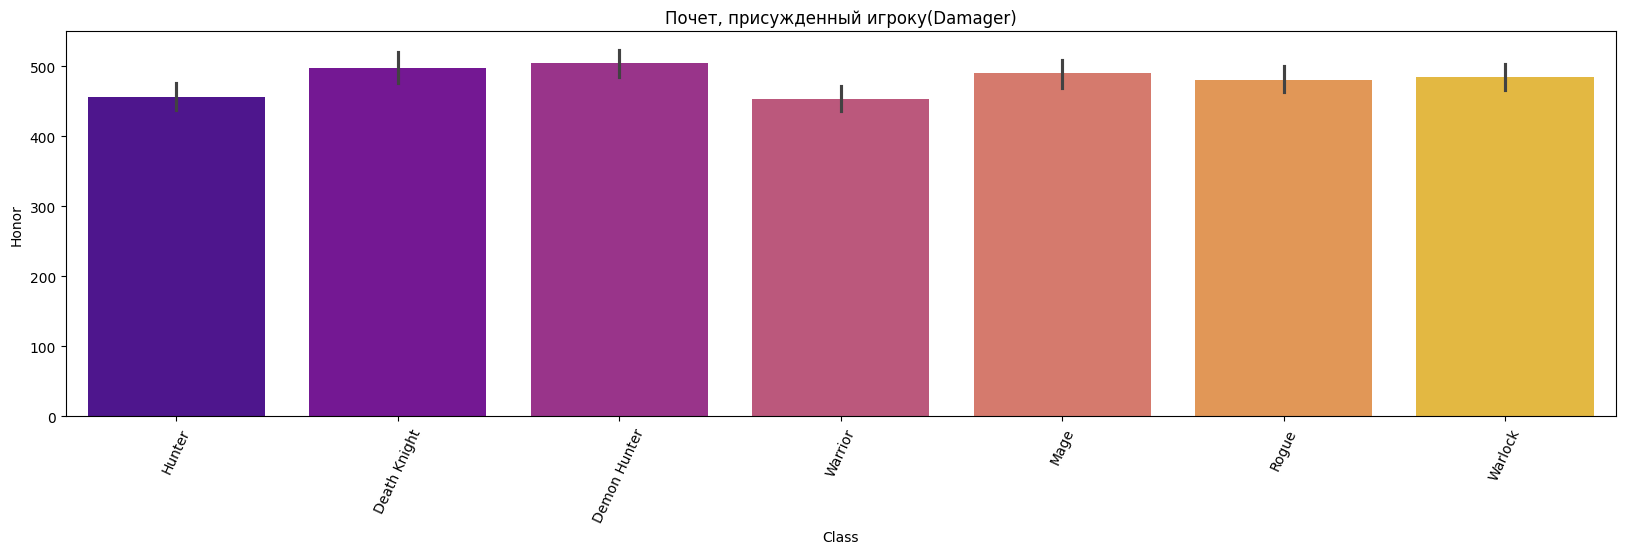

In [274]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win_damager[df_win_damager['Faction']=='Horde']['Class'], y = df_win_damager[df_win_damager['Faction']=='Horde']['Honor'],palette = 'plasma')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(Damager)')
plt.show()


<ipython-input-273-28e6f8e6e2cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win_healer[df_win_healer['Faction']=='Horde']['Class'], y = df_win_healer[df_win_healer['Faction']=='Horde']['Honor'],palette = 'plasma')


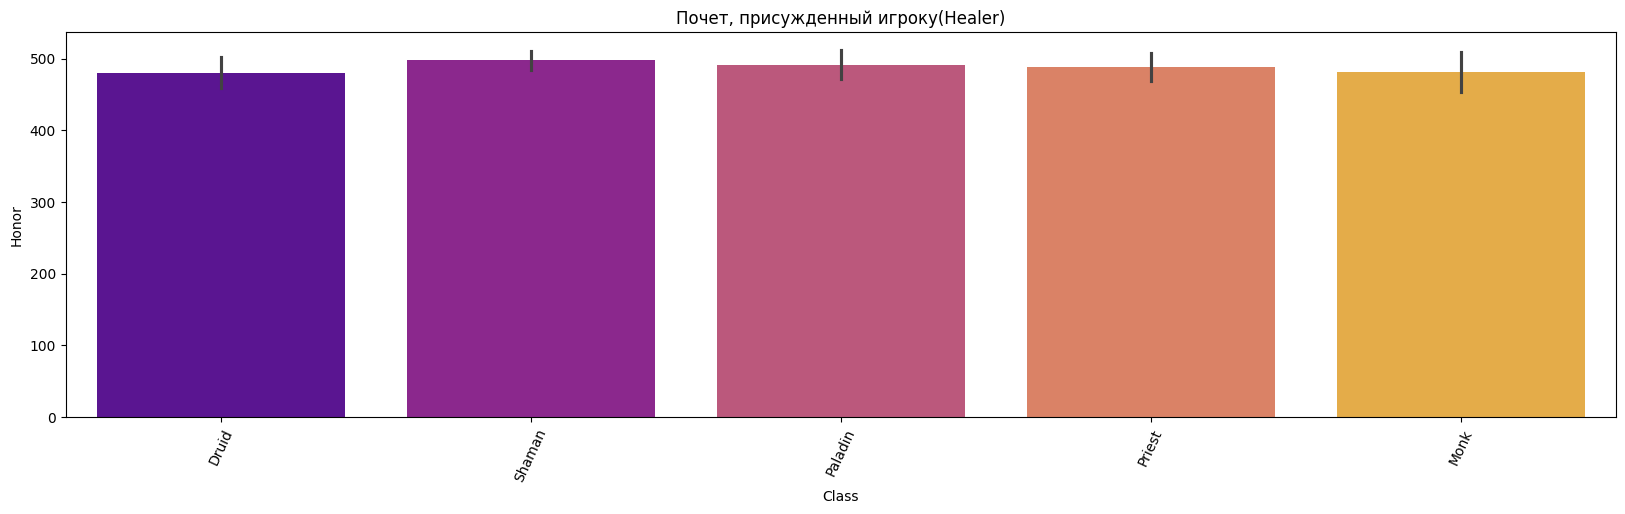

In [273]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win_healer[df_win_healer['Faction']=='Horde']['Class'], y = df_win_healer[df_win_healer['Faction']=='Horde']['Honor'],palette = 'plasma')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(Healer)')
plt.show()

<ipython-input-170-7794455ea24e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_win[df_win['Faction']=='Horde'], x='Rol', palette='crest', order=class_order)


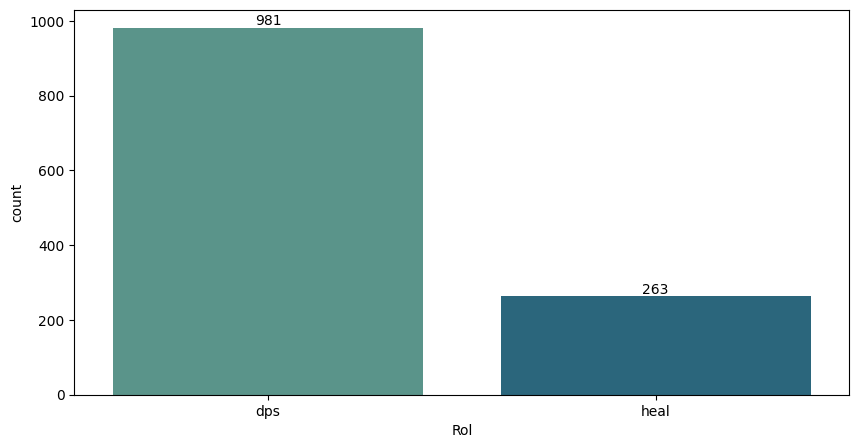

In [ ]:
class_order = df_win[df_win['Faction']=='Horde']['Rol'].value_counts().index
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_win[df_win['Faction']=='Horde'], x='Rol', palette='crest', order=class_order)
cnt = df_win['Rol'].nunique()
for i in range(cnt):
    ax.bar_label(ax.containers[i])
plt.show()

<ipython-input-219-8fc57efa41fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_win[df_win['Faction']=='Horde']['Class'], y = df_win[df_win['Faction']=='Horde']['HD'],palette = 'crest')


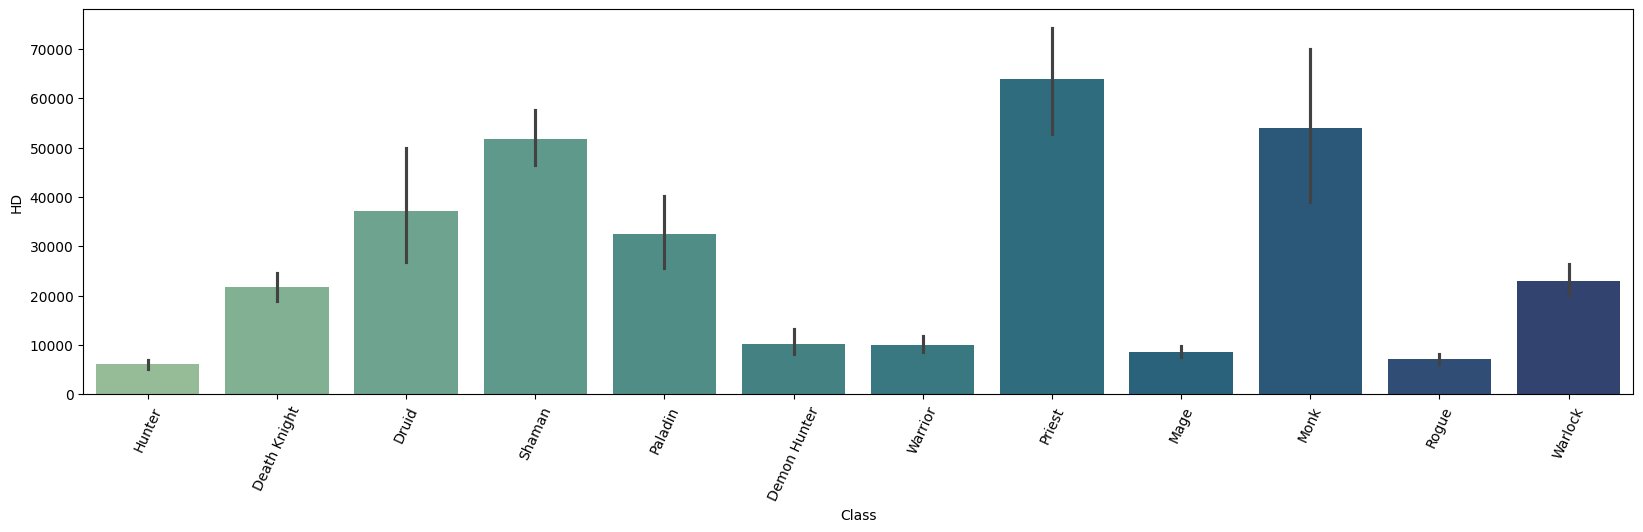

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_win[df_win['Faction']=='Horde']['Class'], y = df_win[df_win['Faction']=='Horde']['HD'],palette = 'crest')
plt.xlabel('Class')
plt.ylabel('HD')
plt.xticks(rotation = 65)
plt.show()

Проигравшие

<ipython-input-172-7f5e9dbd28e2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data = df_lose[df['Faction']=='Horde'], x = 'Class', palette='coolwarm', order = class_order)
<ipython-input-172-7f5e9dbd28e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_lose[df['Faction']=='Horde'], x = 'Class', palette='coolwarm', order = class_order)


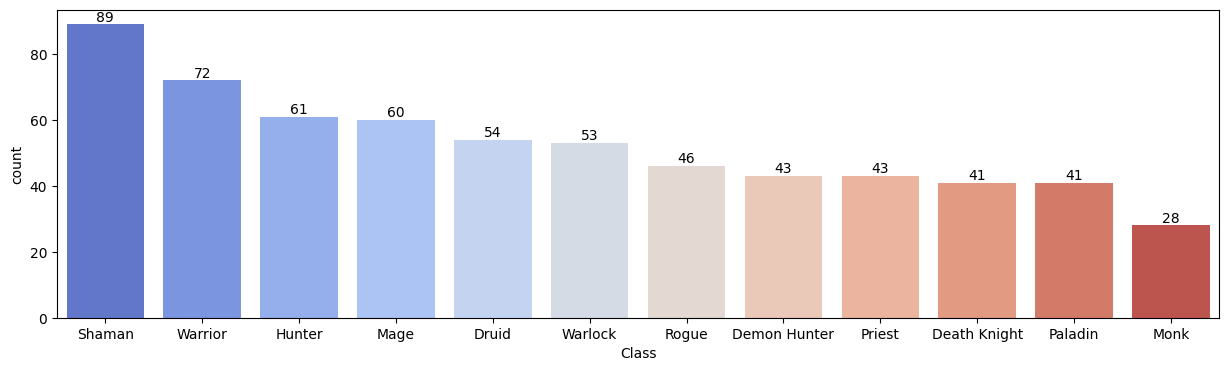

In [ ]:
class_order = df_lose[df_lose['Faction']=='Horde']['Class'].value_counts().index
fig, ax = plt.subplots(figsize = (15,4))
sns.countplot(data = df_lose[df['Faction']=='Horde'], x = 'Class', palette='coolwarm', order = class_order)
cnt = df_lose.Class.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])

<ipython-input-276-92d13c486e33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose[df_lose['Faction']=='Horde']['Class'], y = df_lose[df_lose['Faction']=='Horde']['DD'],palette = 'rocket')


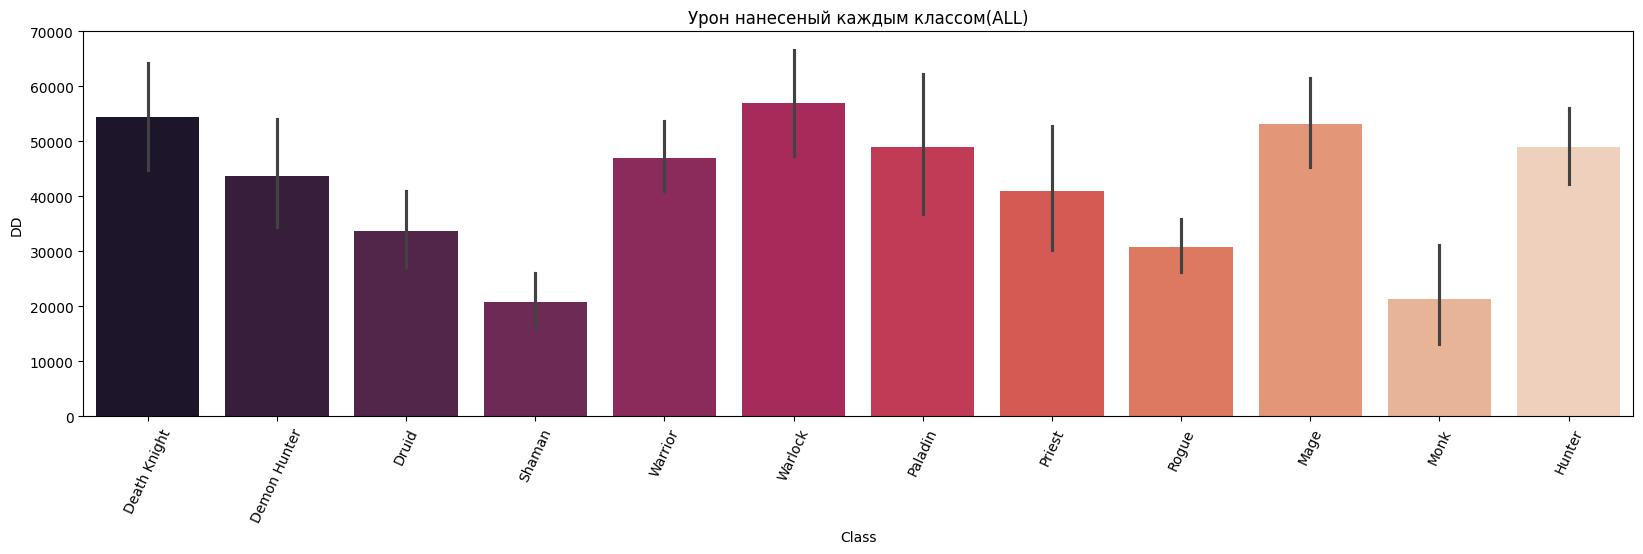

In [276]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose[df_lose['Faction']=='Horde']['Class'], y = df_lose[df_lose['Faction']=='Horde']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(ALL)')
plt.show()

<ipython-input-277-c116d9be8929>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose_damager[df_lose_damager['Faction']=='Horde']['Class'], y = df_lose_damager[df_lose_damager['Faction']=='Horde']['DD'],palette = 'rocket')


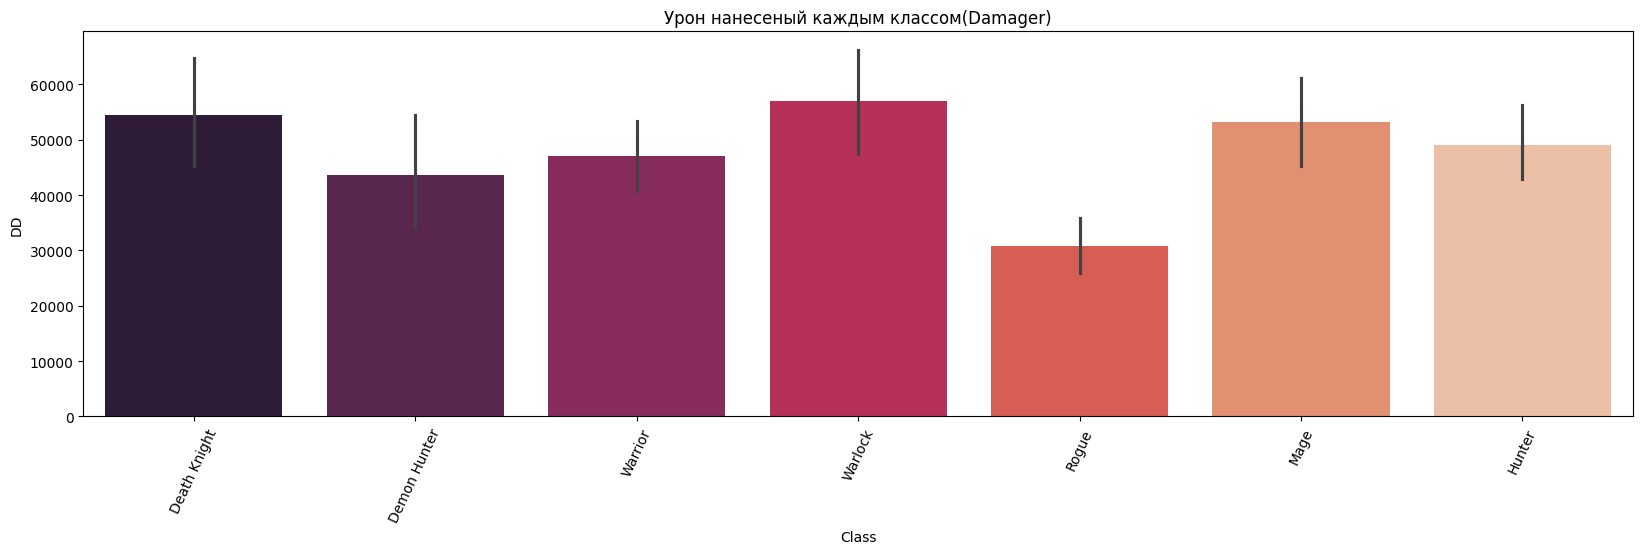

In [277]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose_damager[df_lose_damager['Faction']=='Horde']['Class'], y = df_lose_damager[df_lose_damager['Faction']=='Horde']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(Damager)')
plt.show()

<ipython-input-278-e97656f2bba8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose_healer[df_lose_healer['Faction']=='Horde']['Class'], y = df_lose_healer[df_lose_healer['Faction']=='Horde']['DD'],palette = 'rocket')


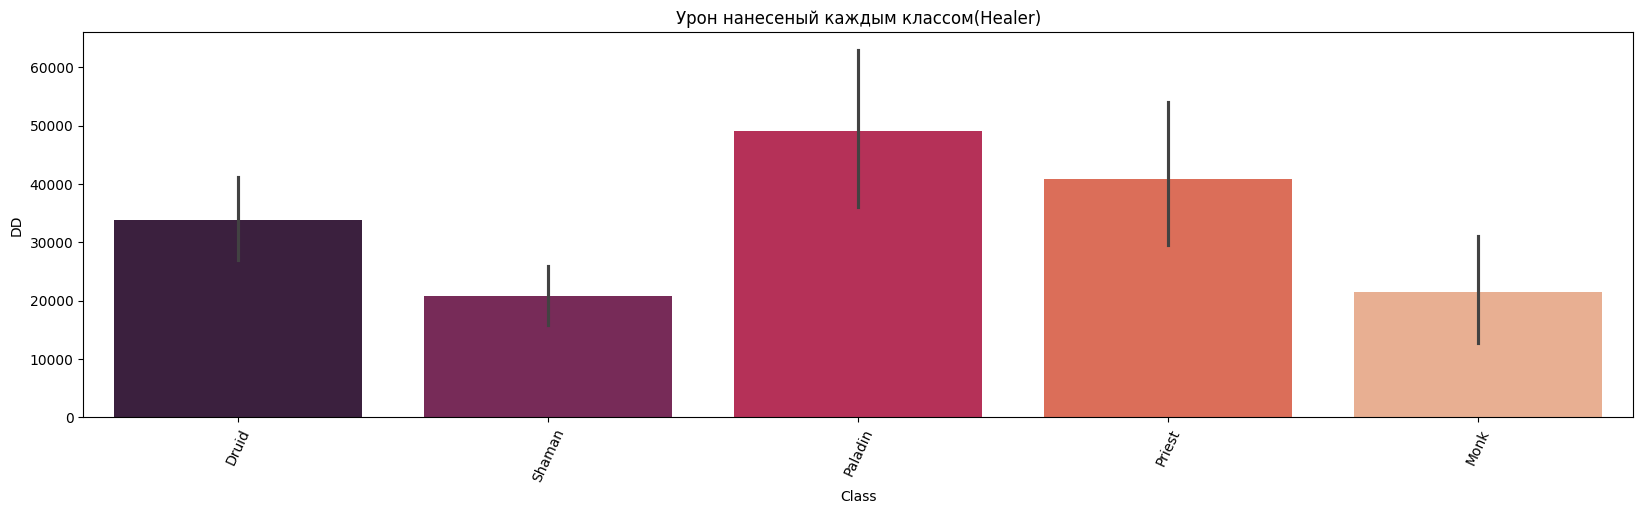

In [278]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose_healer[df_lose_healer['Faction']=='Horde']['Class'], y = df_lose_healer[df_lose_healer['Faction']=='Horde']['DD'],palette = 'rocket')
plt.xlabel('Class')
plt.ylabel('DD')
plt.xticks(rotation = 65)
plt.title('Урон нанесеный каждым классом(Healer)')
plt.show()

<ipython-input-279-b421ef343bcf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose[df_lose['Faction']=='Horde']['Class'], y = df_lose[df_lose['Faction']=='Horde']['Honor'],palette = 'inferno')


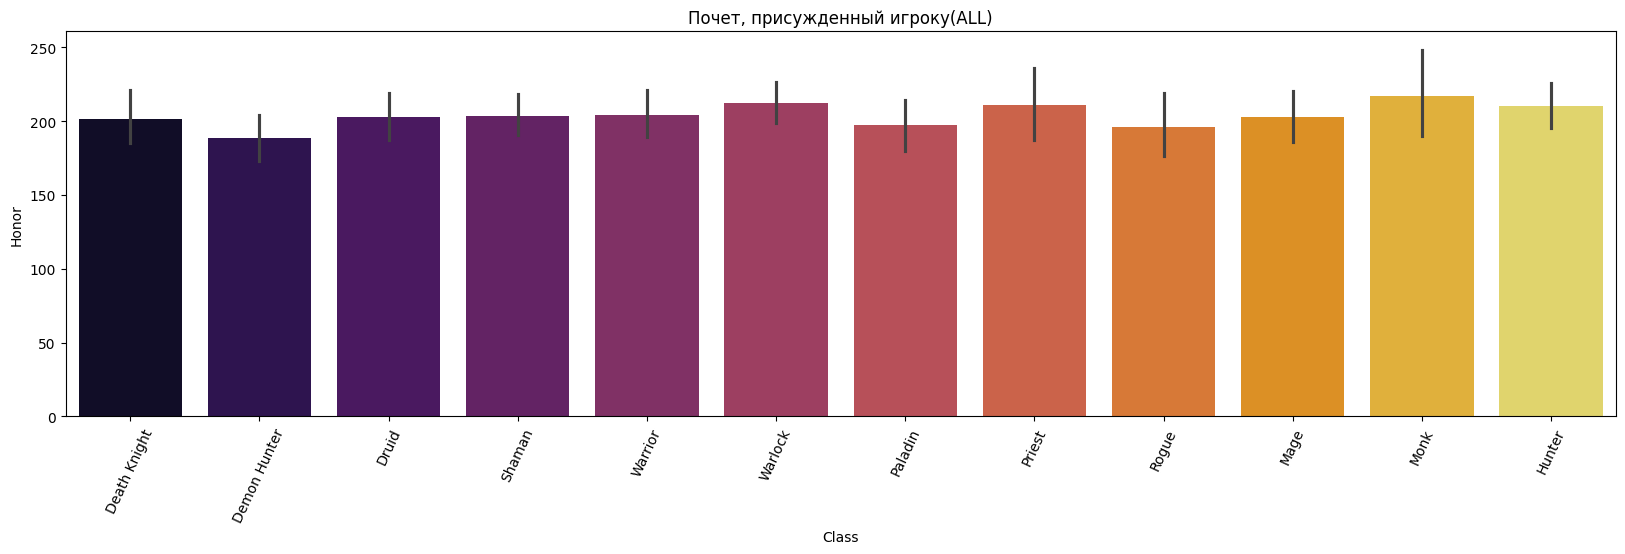

In [279]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose[df_lose['Faction']=='Horde']['Class'], y = df_lose[df_lose['Faction']=='Horde']['Honor'],palette = 'inferno')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(ALL)')
plt.show()


<ipython-input-280-965b67c10b6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose_damager[df_lose_damager['Faction']=='Horde']['Class'], y = df_lose_damager[df_lose_damager['Faction']=='Horde']['Honor'],palette = 'inferno')


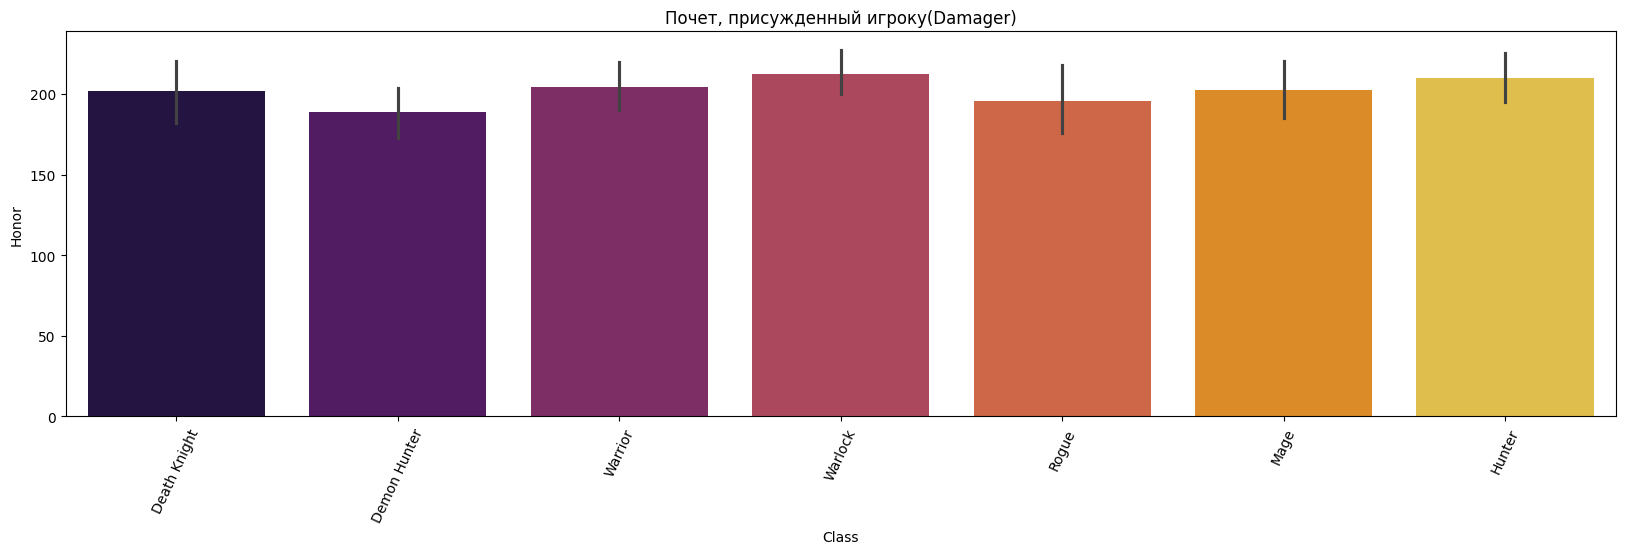

In [280]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose_damager[df_lose_damager['Faction']=='Horde']['Class'], y = df_lose_damager[df_lose_damager['Faction']=='Horde']['Honor'],palette = 'inferno')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(Damager)')
plt.show()


<ipython-input-281-edc155d53a20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose_healer[df_lose_healer['Faction']=='Horde']['Class'], y = df_lose_healer[df_lose_healer['Faction']=='Horde']['Honor'],palette = 'inferno')


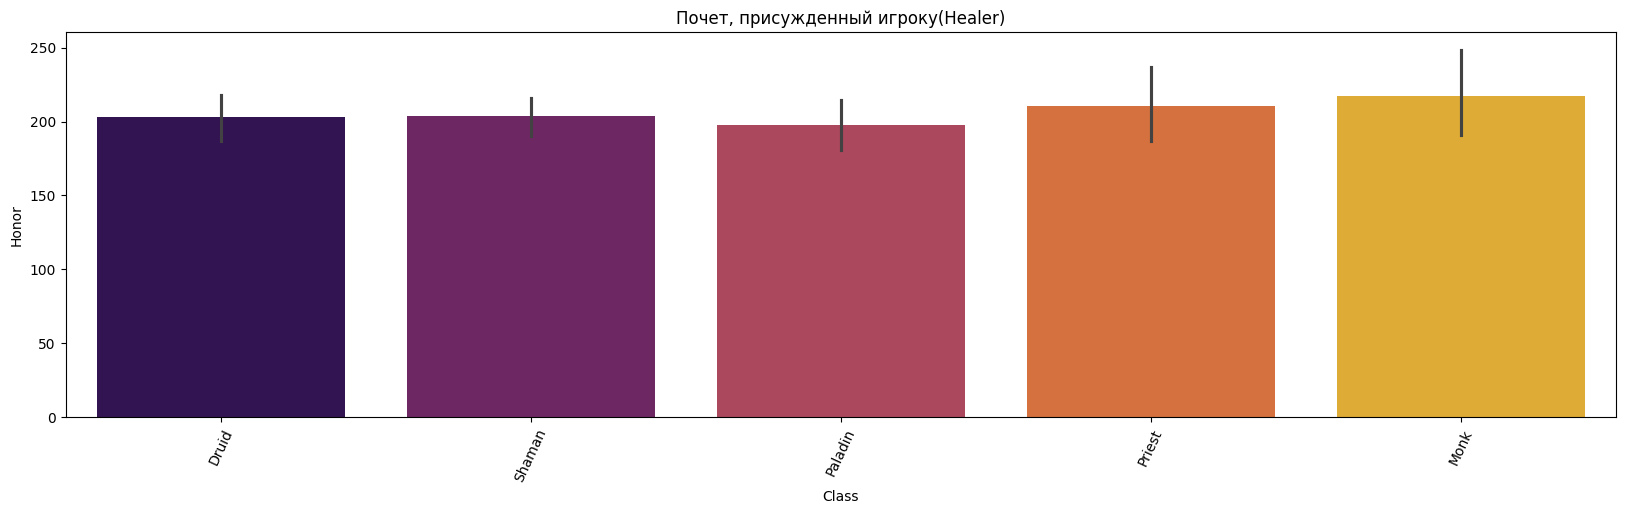

In [281]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose_healer[df_lose_healer['Faction']=='Horde']['Class'], y = df_lose_healer[df_lose_healer['Faction']=='Horde']['Honor'],palette = 'inferno')
plt.xlabel('Class')
plt.ylabel('Honor')
plt.xticks(rotation = 65)
plt.title('Почет, присужденный игроку(Healer)')
plt.show()


<ipython-input-173-44042d5e258c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_lose[df_lose['Faction']=='Horde'], x='Rol', palette='crest', order=class_order)


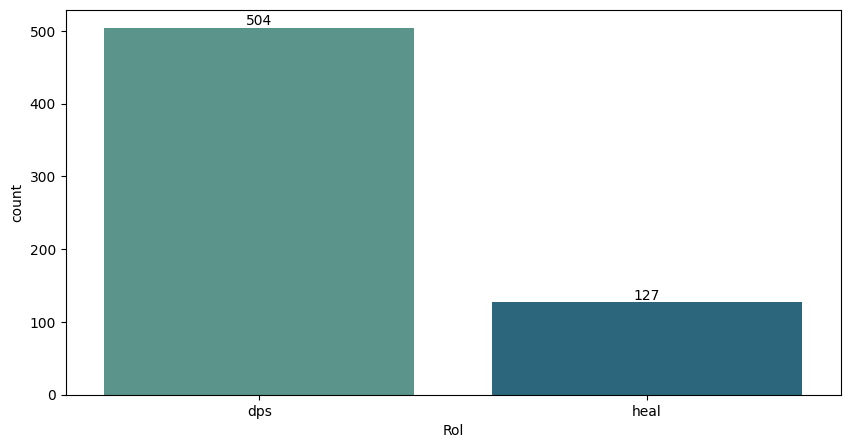

In [ ]:
class_order = df_lose[df_lose['Faction']=='Horde']['Rol'].value_counts().index
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_lose[df_lose['Faction']=='Horde'], x='Rol', palette='crest', order=class_order)
cnt = df_lose['Rol'].nunique()
for i in range(cnt):
    ax.bar_label(ax.containers[i])
plt.show()

<ipython-input-220-385fe27b0923>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_lose[df_lose['Faction']=='Horde']['Class'], y = df_lose[df_lose['Faction']=='Horde']['HD'],palette = 'crest')


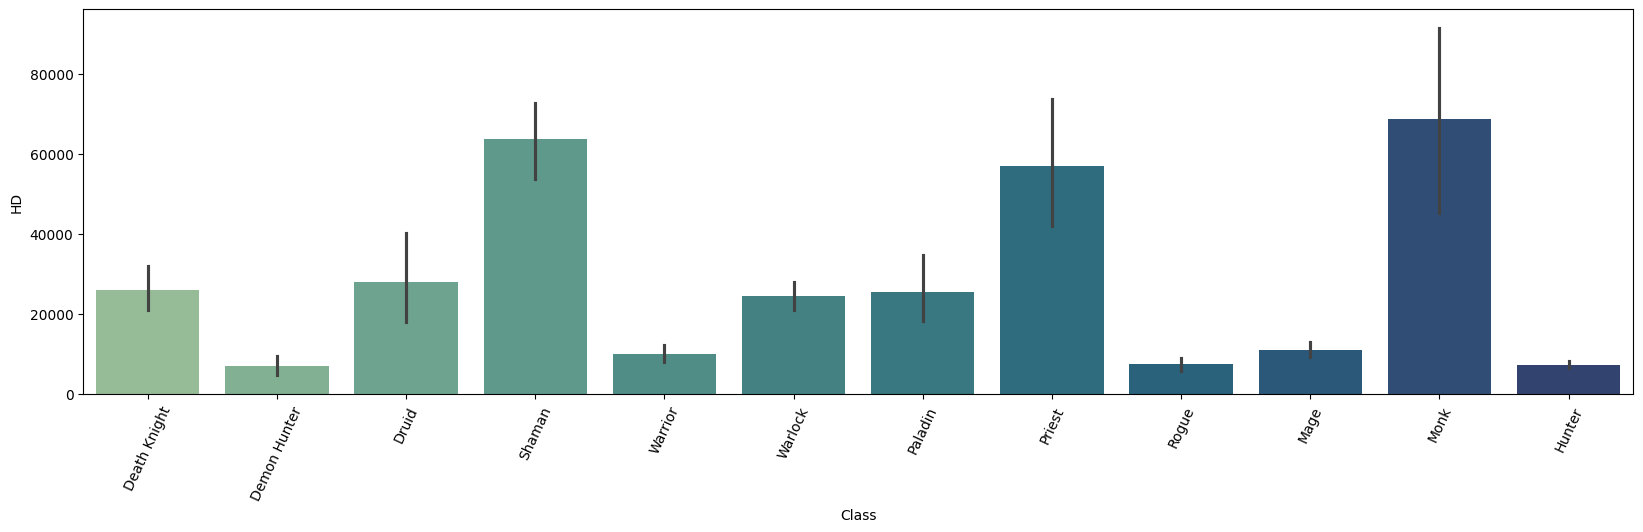

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_lose[df_lose['Faction']=='Horde']['Class'], y = df_lose[df_lose['Faction']=='Horde']['HD'],palette = 'crest')
plt.xlabel('Class')
plt.ylabel('HD')
plt.xticks(rotation = 65)
plt.show()

# Совместно

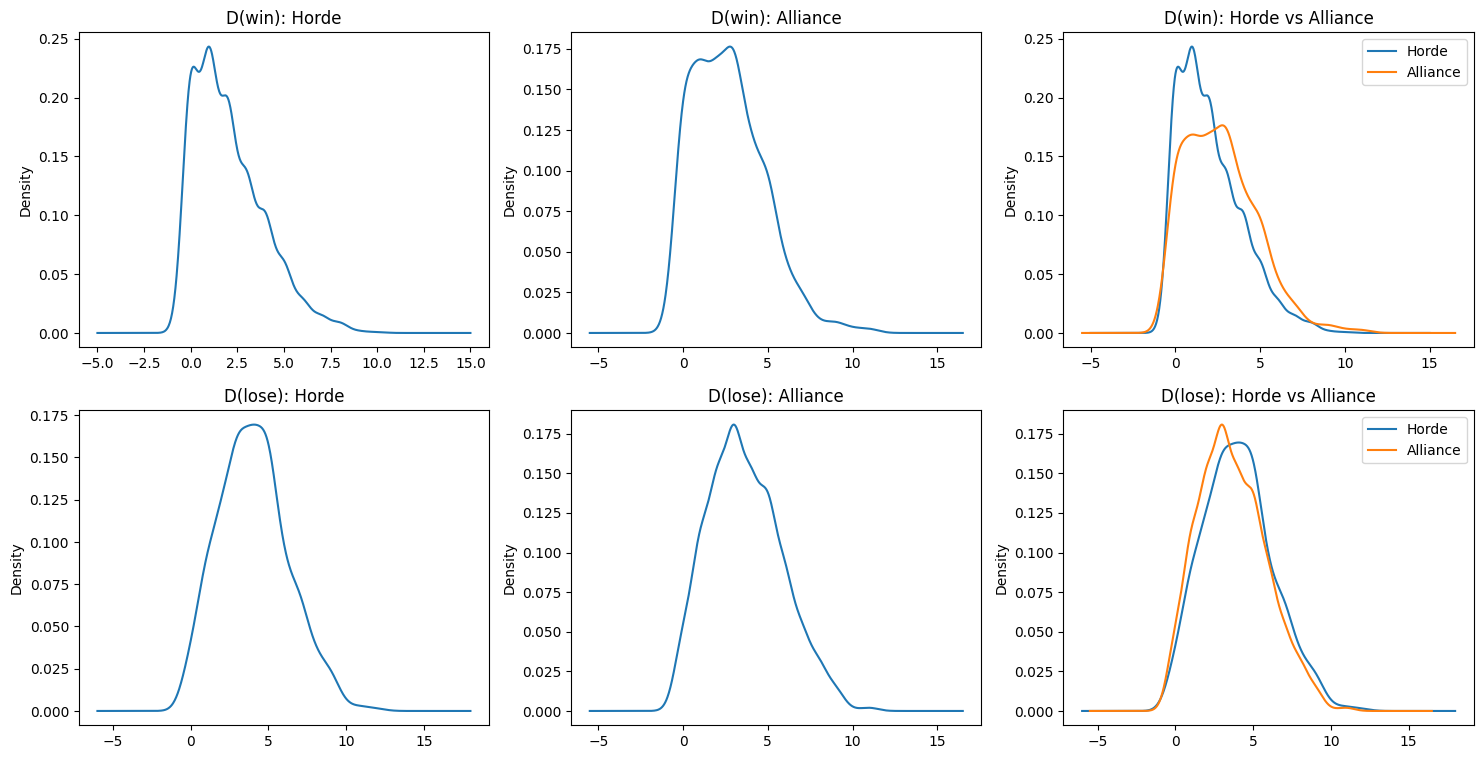

In [ ]:
#Количество всех смертей
plt.figure(figsize=(18, 9))

# Графики для win
plt.subplot(2, 3, 1)
ax1 = df_win[df_win['Faction']=='Horde'].D.plot(kind='kde', title='D(win): Horde')
plt.subplot(2, 3, 2)
ax2 = df_win[df_win['Faction']=='Alliance'].D.plot(kind='kde', title='D(win): Alliance')
plt.subplot(2, 3, 3)
df_win[df_win['Faction']=='Horde'].D.plot(kind='kde', title='D(win): Horde vs Alliance')
df_win[df_win['Faction']=='Alliance'].D.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

# Графики для lose
plt.subplot(2, 3, 4)
ax3 = df_lose[df_lose['Faction']=='Horde'].D.plot(kind='kde', title='D(lose): Horde')
plt.subplot(2, 3, 5)
ax4 = df_lose[df_lose['Faction']=='Alliance'].D.plot(kind='kde', title='D(lose): Alliance')
plt.subplot(2, 3, 6)
df_lose[df_lose['Faction']=='Horde'].D.plot(kind='kde', title='D(lose): Horde vs Alliance')
df_lose[df_lose['Faction']=='Alliance'].D.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

plt.show()

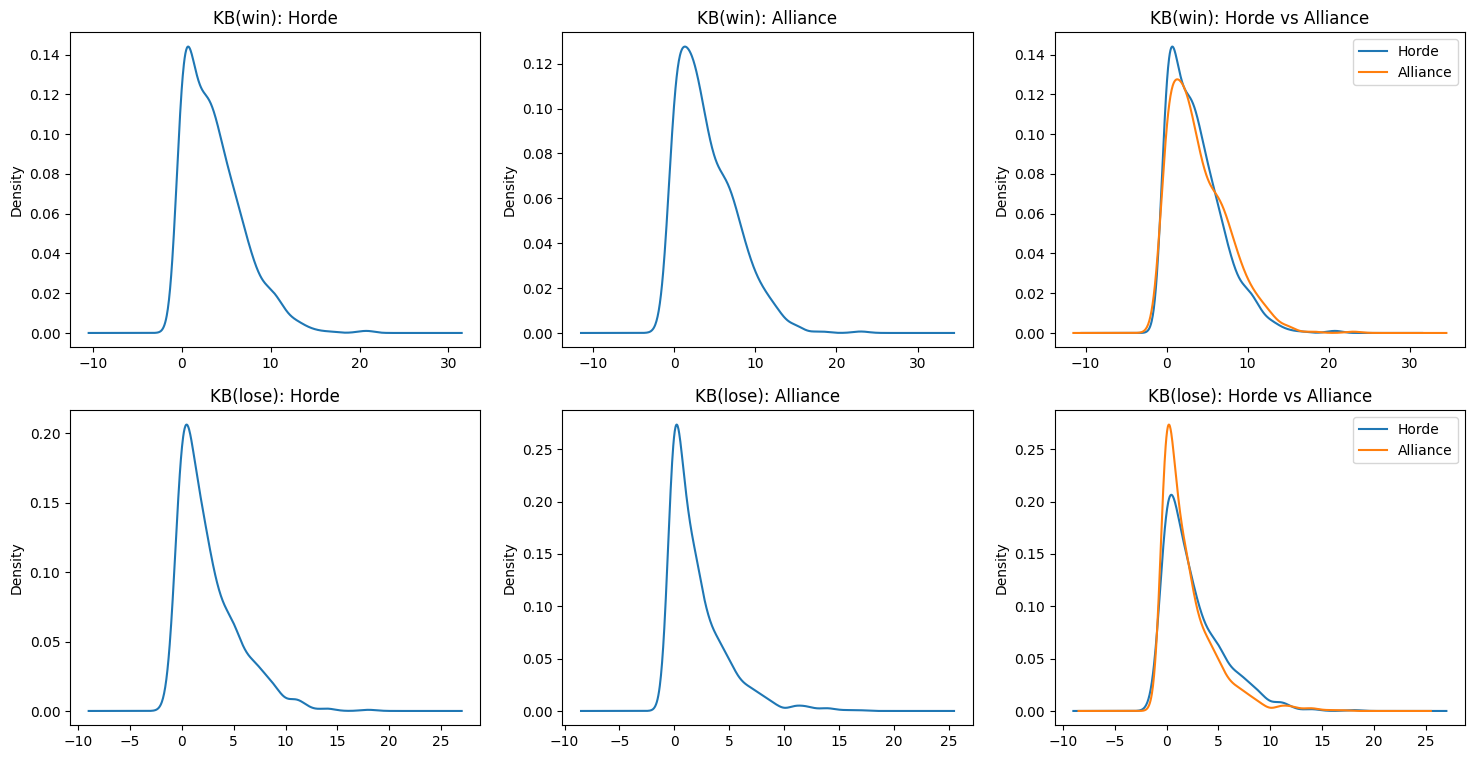

In [ ]:
#Количество всех смертей от игроков
plt.figure(figsize=(18, 9))

# Графики для win
plt.subplot(2, 3, 1)
ax1 = df_win[df_win['Faction']=='Horde'].KB.plot(kind='kde', title='KB(win): Horde')
plt.subplot(2, 3, 2)
ax2 = df_win[df_win['Faction']=='Alliance'].KB.plot(kind='kde', title='KB(win): Alliance')
plt.subplot(2, 3, 3)
df_win[df_win['Faction']=='Horde'].KB.plot(kind='kde', title='KB(win): Horde vs Alliance')
df_win[df_win['Faction']=='Alliance'].KB.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

# Графики для lose
plt.subplot(2, 3, 4)
ax3 = df_lose[df_lose['Faction']=='Horde'].KB.plot(kind='kde', title='KB(lose): Horde')
plt.subplot(2, 3, 5)
ax4 = df_lose[df_lose['Faction']=='Alliance'].KB.plot(kind='kde', title='KB(lose): Alliance')
plt.subplot(2, 3, 6)
df_lose[df_lose['Faction']=='Horde'].KB.plot(kind='kde', title='KB(lose): Horde vs Alliance')
df_lose[df_lose['Faction']=='Alliance'].KB.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

plt.show()

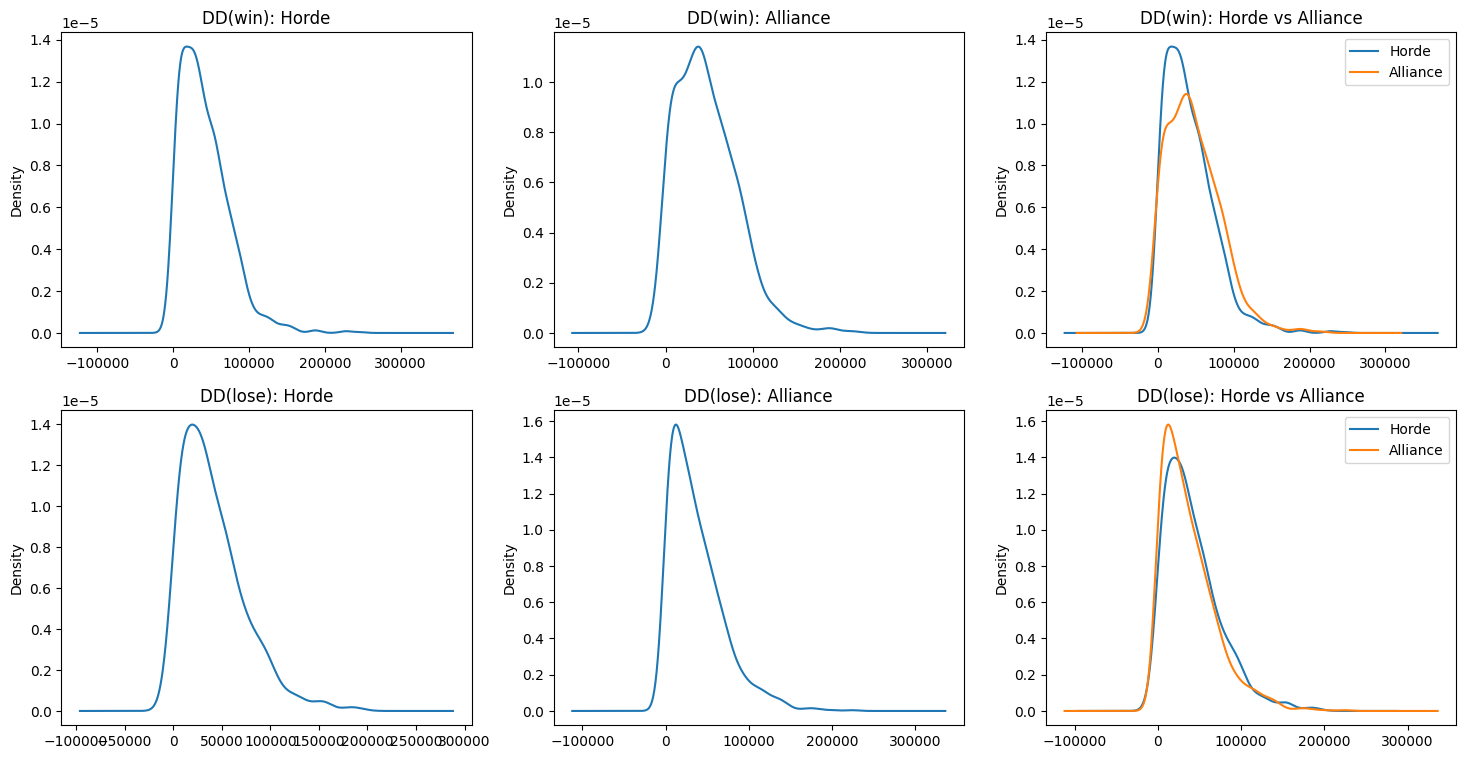

In [ ]:
#Урон, нанесенный игроком.
plt.figure(figsize=(18, 9))

# Графики для win
plt.subplot(2, 3, 1)
ax1 = df_win[df_win['Faction']=='Horde'].DD.plot(kind='kde', title='DD(win): Horde')
plt.subplot(2, 3, 2)
ax2 = df_win[df_win['Faction']=='Alliance'].DD.plot(kind='kde', title='DD(win): Alliance')
plt.subplot(2, 3, 3)
df_win[df_win['Faction']=='Horde'].DD.plot(kind='kde', title='DD(win): Horde vs Alliance')
df_win[df_win['Faction']=='Alliance'].DD.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

# Графики для lose
plt.subplot(2, 3, 4)
ax3 = df_lose[df_lose['Faction']=='Horde'].DD.plot(kind='kde', title='DD(lose): Horde')
plt.subplot(2, 3, 5)
ax4 = df_lose[df_lose['Faction']=='Alliance'].DD.plot(kind='kde', title='DD(lose): Alliance')
plt.subplot(2, 3, 6)
df_lose[df_lose['Faction']=='Horde'].DD.plot(kind='kde', title='DD(lose): Horde vs Alliance')
df_lose[df_lose['Faction']=='Alliance'].DD.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

plt.show()

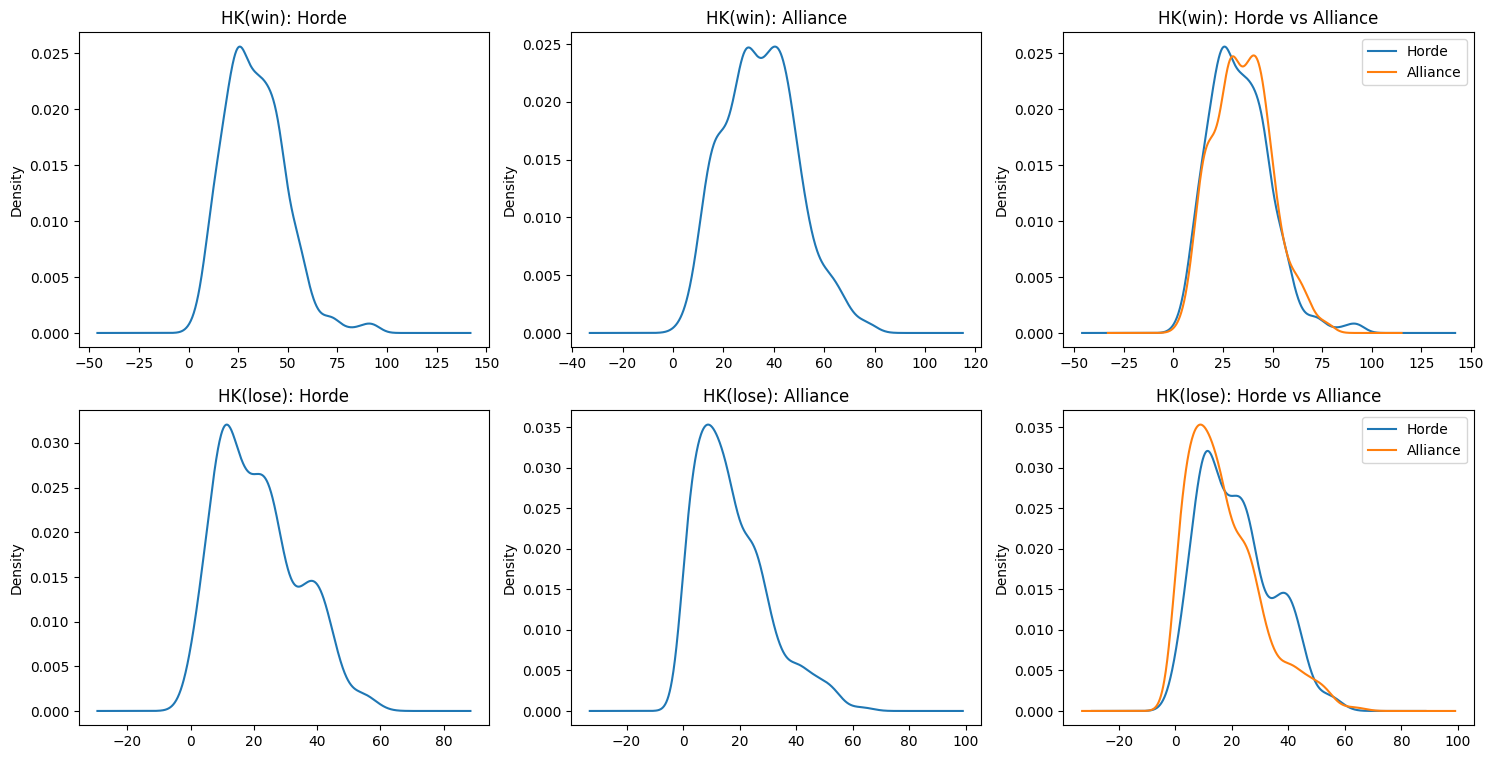

In [ ]:
#Количество убийств, в которых игрок или его/ее группа принимали участие.
plt.figure(figsize=(18, 9))

# Графики для win
plt.subplot(2, 3, 1)
ax1 = df_win[df_win['Faction']=='Horde'].HK.plot(kind='kde', title='HK(win): Horde')
plt.subplot(2, 3, 2)
ax2 = df_win[df_win['Faction']=='Alliance'].HK.plot(kind='kde', title='HK(win): Alliance')
plt.subplot(2, 3, 3)
df_win[df_win['Faction']=='Horde'].HK.plot(kind='kde', title='HK(win): Horde vs Alliance')
df_win[df_win['Faction']=='Alliance'].HK.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

# Графики для lose
plt.subplot(2, 3, 4)
ax3 = df_lose[df_lose['Faction']=='Horde'].HK.plot(kind='kde', title='HK(lose): Horde')
plt.subplot(2, 3, 5)
ax4 = df_lose[df_lose['Faction']=='Alliance'].HK.plot(kind='kde', title='HK(lose): Alliance')
plt.subplot(2, 3, 6)
df_lose[df_lose['Faction']=='Horde'].HK.plot(kind='kde', title='HK(lose): Horde vs Alliance')
df_lose[df_lose['Faction']=='Alliance'].HK.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

plt.show()

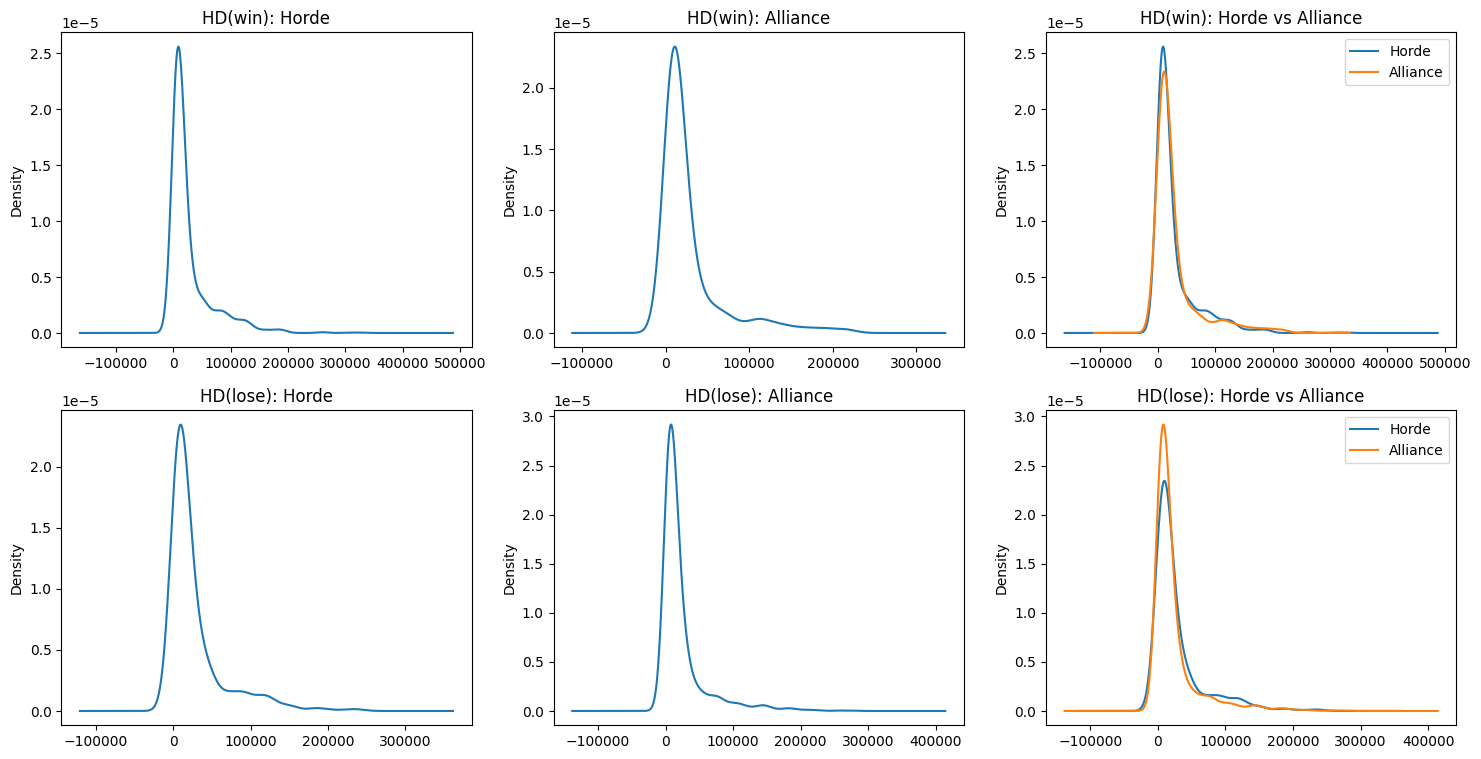

In [ ]:
# Исцеление, выполненное игроком.
plt.figure(figsize=(18, 9))

# Графики для win
plt.subplot(2, 3, 1)
ax1 = df_win[df_win['Faction']=='Horde'].HD.plot(kind='kde', title='HD(win): Horde')
plt.subplot(2, 3, 2)
ax2 = df_win[df_win['Faction']=='Alliance'].HD.plot(kind='kde', title='HD(win): Alliance')
plt.subplot(2, 3, 3)
df_win[df_win['Faction']=='Horde'].HD.plot(kind='kde', title='HD(win): Horde vs Alliance')
df_win[df_win['Faction']=='Alliance'].HD.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

# Графики для lose
plt.subplot(2, 3, 4)
ax3 = df_lose[df_lose['Faction']=='Horde'].HD.plot(kind='kde', title='HD(lose): Horde')
plt.subplot(2, 3, 5)
ax4 = df_lose[df_lose['Faction']=='Alliance'].HD.plot(kind='kde', title='HD(lose): Alliance')
plt.subplot(2, 3, 6)
df_lose[df_lose['Faction']=='Horde'].HD.plot(kind='kde', title='HD(lose): Horde vs Alliance')
df_lose[df_lose['Faction']=='Alliance'].HD.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

plt.show()

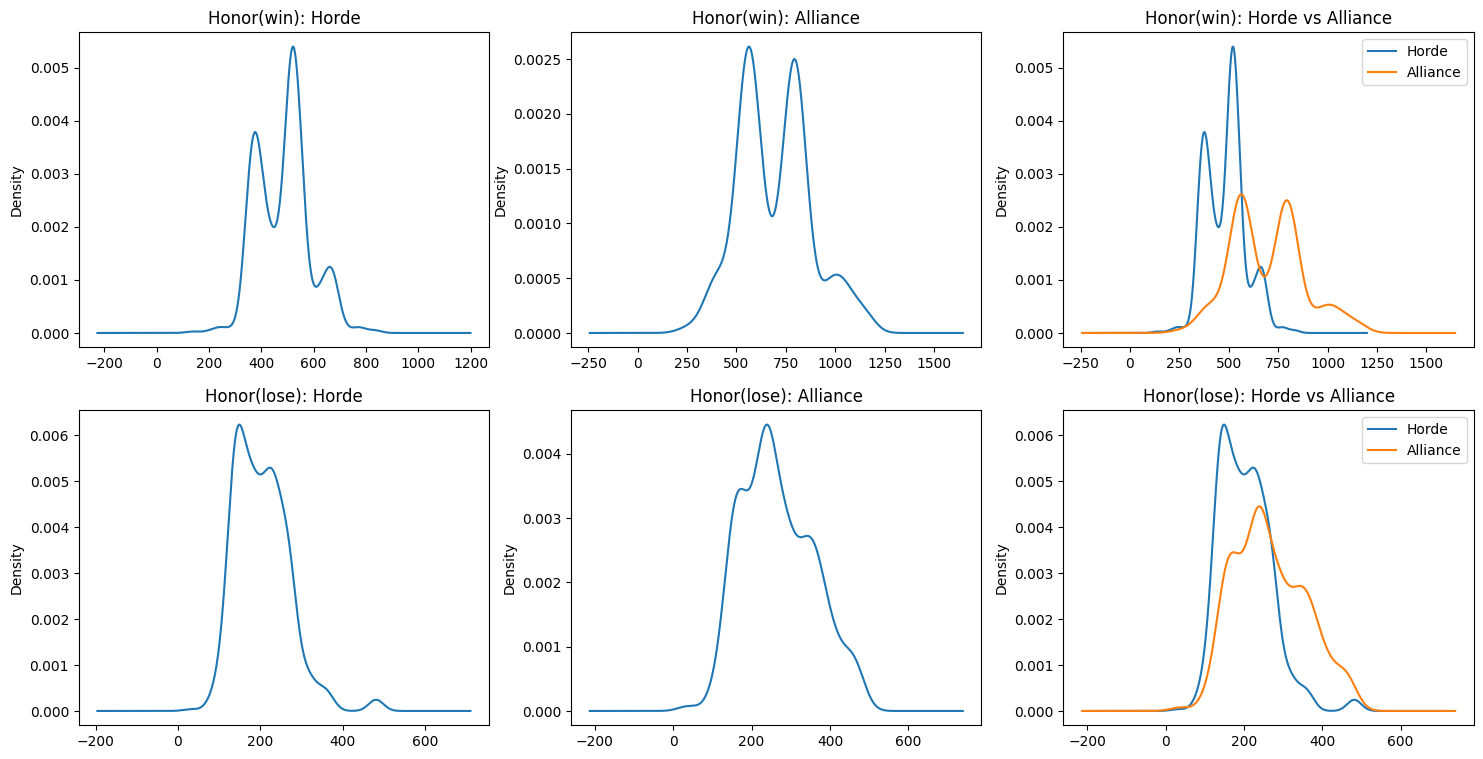

In [ ]:
# Почет, присужденный игроку.
plt.figure(figsize=(18, 9))

# Графики для win
plt.subplot(2, 3, 1)
ax1 = df_win[df_win['Faction']=='Horde'].Honor.plot(kind='kde', title='Honor(win): Horde')
plt.subplot(2, 3, 2)
ax2 = df_win[df_win['Faction']=='Alliance'].Honor.plot(kind='kde', title='Honor(win): Alliance')
plt.subplot(2, 3, 3)
df_win[df_win['Faction']=='Horde'].Honor.plot(kind='kde', title='Honor(win): Horde vs Alliance')
df_win[df_win['Faction']=='Alliance'].Honor.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

# Графики для lose
plt.subplot(2, 3, 4)
ax3 = df_lose[df_lose['Faction']=='Horde'].Honor.plot(kind='kde', title='Honor(lose): Horde')
plt.subplot(2, 3, 5)
ax4 = df_lose[df_lose['Faction']=='Alliance'].Honor.plot(kind='kde', title='Honor(lose): Alliance')
plt.subplot(2, 3, 6)
df_lose[df_lose['Faction']=='Horde'].Honor.plot(kind='kde', title='Honor(lose): Horde vs Alliance')
df_lose[df_lose['Faction']=='Alliance'].Honor.plot(kind='kde')
plt.legend(['Horde', 'Alliance'])

plt.show()

## Вывод

# Победиетели:

Альянс/Орда - 645/1244

Больше/меньше игроков определенного класса - Шаман(228)/Монах(84)

Количество дамагеров/хилеров - 1507/382

смертей: меньше


**Альянс:**

Больше/меньше игроков определенного класса - Друид(84)/Шаман(34)

Больше нанесли урон(Класс) и их количество - **Death Knight**(45) и **Warlock**(38)

Класс с самым большим внесенным почета  и их количество - **Demon Hunter**(53), **Mage**(60) и **Monk**(40)

Больше исцелил(Класс) и их количестов - **Monk**(40)

**Орда:**

Больше/меньше игроков определенного класса - Шаман(197)/Монах(44)

Больше нанесли урон(Класс) и их количество - **Death Knight**(81) и **Mage**(96)

Класс с самым большим внесенным почета  и их количество - **Death Knight**(81), **Demon Hunter**(99) и **Warlock**(102)

Больше исцелил(Класс) и их количестов - **Priest**(108)

# Проигравшие:

Альянс/Орда - 1206/631

Больше/меньше игроков определенного класса - Друид(195)/Монах(83)

Количество дамагеров/хилеров - 1493/344

смертей: больше

**Альянс:**

Больше/меньше игроков определенного класса - Друид(141)/Монах(55)

Больше нанесли урон(Класс) и их количество - **Death Knight**(60)  и **Warlock**(87)

Класс с самым большим внесенным почета  и их количество - **Paladin**(118),**Shaman**(79) и **Priest**(104)

Больше исцелил(Класс) и их количестов - **Monk**(55) и **Priest**(104)

**Орда:**

Больше/меньше игроков определенного класса - Шаман(89)/Монах(28)

Больше нанесли урон(Класс) и их количество - **Warlock**(53),**Death Knight**(41) и **Mage**(60)

Класс с самым большим внесенным почета  и их количество - **Monk**(28)

Больше исцелил(Класс) и их количестов - **Monk**(28) и **Shaman**(89)